# Student Academic Performance Prediction  
## First Notebook: Exploratory Data Analysis (EDA)

Over recent decades, understanding the determinants of academic achievement in secondary education has become increasingly important, particularly in the context of early identification of students at risk of academic underperformance. While final academic outcomes are influenced by prior performance, a wide range of demographic, familial, social, and school-related factors also play a critical role in shaping student trajectories throughout the school year.

This project is based on the Student Performance Dataset, which captures academic results and contextual information for students attending two Portuguese secondary schools. The data were collected through official school records and student questionnaires, and are provided in two separate datasets corresponding to performance in **Mathematics** and **Portuguese language**. Although the explanatory variables are largely identical across both datasets, academic outcomes remain subject-specific, allowing for parallel modeling and comparison across disciplines.

Each observation also includes three academic grade variables: `G1` (first period grade), `G2` (second period grade), and `G3` (final grade). The target variable for the predictive phase of this project is `G3`, which represents cumulative performance at the end of the academic year. As `G3` is strongly correlated with the intermediate grades `G1` and `G2`, an important methodological consideration involves determining how and when these variables should be incorporated into predictive models, depending on the intended use case and timing of the prediction.

The overarching objective of this project is to develop a **predictive model** capable of estimating students’ final academic performance based on available academic and contextual information. To support this objective, the present notebook is dedicated exclusively to **Exploratory Data Analysis (EDA)**, with the goal of examining variable distributions, identifying relationships between features and the target variable, and uncovering patterns that may inform subsequent feature engineering and model development.

**Author:** J-F Jutras  
**Date:** January 2026  
**Dataset:** Student Performance — UCI / Kaggle (Portuguese Secondary Education)


## 1.1-Data Loading and Overview

In [1]:
import pandas as pd
import os
import kagglehub

#Download latest version of the dataset
path = kagglehub.dataset_download("jaimeh1/acamedicperfomance")

#Define dataset path
dataset_dir = "/kaggle/input/acamedicperfomance"

#Load Portuguese dataset
port_csv = os.path.join(dataset_dir, "student_language.csv")
df_port = pd.read_csv(port_csv, sep = ";")

#Load Math dataset
math_csv = os.path.join(dataset_dir, "student_math.csv")
df_math = pd.read_csv(math_csv, sep = ";")

#Basic checks
display(df_port.head())
display(df_math.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Column Description

| Variable | Description | Variable | Description |
|---------|-------------|---------|-------------|
| school | Student's school (GP or MS) | sex | Student's sex (F or M) |
| age | Student's age (15–22) | address | Home address type (Urban or Rural) |
| famsize | Family size (≤3 or >3) | Pstatus | Parents' cohabitation status |
| Medu | Mother's education level (0–4) | Fedu | Father's education level (0–4) |
| Mjob | Mother's occupation | Fjob | Father's occupation |
| reason | Reason for choosing the school | guardian | Student's guardian |
| traveltime | Home-to-school travel time (1–4) | studytime | Weekly study time (1–4) |
| failures | Number of past class failures | schoolsup | Extra educational support |
| famsup | Family educational support | paid | Extra paid classes (subject-specific) |
| activities | Extra-curricular activities | nursery | Attended nursery school |
| higher | Intention to pursue higher education | internet | Internet access at home |
| romantic | In a romantic relationship | famrel | Family relationship quality (1–5) |
| freetime | Free time after school (1–5) | goout | Going out with friends (1–5) |
| Dalc | Workday alcohol consumption (1–5) | Walc | Weekend alcohol consumption (1–5) |
| health | Current health status (1–5) | absences | Number of school absences |
| G1 | First period grade (0–20) | G2 | Second period grade (0–20) |
| G3 | Final grade (0–20) |  |  |


In [2]:
#Clone the public GitHub repository "jfj-utils" into the current Kaggle working directory.
#This downloads all files and folders from the repo so they can be used in the notebook.
!rm -rf /kaggle/working/jfj-utils
!git clone https://github.com/jfjutras07/jfj-utils.git

#Add the cloned repository to the Python path so Python can import modules from it
import sys
sys.path.append("/kaggle/working/jfj-utils")

#Use a function to display a comprehensive overview of the data (port)
from ingestion.readers import check_data
check_data(df_port)

Cloning into 'jfj-utils'...
remote: Enumerating objects: 1903, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 1903 (delta 119), reused 21 (delta 21), pack-reused 1738 (from 2)
Receiving objects: 100% (1903/1903), 625.19 KiB | 6.19 MiB/s, done.
Resolving deltas: 100% (1231/1231), done.

Columns: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'] 

Shape: (649, 33) 

Data types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int

In [3]:
#Display a comprehensive overview of the data (math)
check_data(df_math)


Columns: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'] 

Shape: (395, 33) 

Data types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int6

We have two datasets (Portuguese or P: 649 rows, Math or M: 395 rows) with identical structure (33 columns, same data types, no missing values, no duplicates within each dataset).

In [4]:
#Columns used to identify a student (excluding grades)  using all demographic, social, and school-related
#featuresto see if the same profile appears in both datasets
cols_to_check = [
    'school','sex','age','address','famsize','Pstatus',
    'Medu','Fedu','Mjob','Fjob','reason','guardian',
    'traveltime','studytime','failures','schoolsup','famsup',
    'paid','activities','nursery','higher','internet','romantic',
    'famrel','freetime','goout','Dalc','Walc','health','absences'
]

#Check for exact matching rows (same student profile) across the two datasets
duplicates_between = pd.merge(
    df_port[cols_to_check],  
    df_math[cols_to_check],  
    how='inner'
)

#Print the number of exact duplicates
print("Number of exact duplicate profiles between the two datasets:", len(duplicates_between))

Number of exact duplicate profiles between the two datasets: 39


There are 39 exact profile duplicates across datasets, but no unique student ID exists, so the datasets are treated as independent for analysis.

## 1.2-Data Structure and Quality Assessment

In [5]:
from eda.describe_structure import describe_structure
describe_structure(df_port)


=== Numeric Columns ===

            count       mean       std   min   25%   50%   75%   max
age         649.0  16.744222  1.218138  15.0  16.0  17.0  18.0  22.0
Medu        649.0   2.514638  1.134552   0.0   2.0   2.0   4.0   4.0
Fedu        649.0   2.306626  1.099931   0.0   1.0   2.0   3.0   4.0
traveltime  649.0   1.568567  0.748660   1.0   1.0   1.0   2.0   4.0
studytime   649.0   1.930663  0.829510   1.0   1.0   2.0   2.0   4.0
failures    649.0   0.221880  0.593235   0.0   0.0   0.0   0.0   3.0
famrel      649.0   3.930663  0.955717   1.0   4.0   4.0   5.0   5.0
freetime    649.0   3.180277  1.051093   1.0   3.0   3.0   4.0   5.0
goout       649.0   3.184900  1.175766   1.0   2.0   3.0   4.0   5.0
Dalc        649.0   1.502311  0.924834   1.0   1.0   1.0   2.0   5.0
Walc        649.0   2.280431  1.284380   1.0   1.0   2.0   3.0   5.0
health      649.0   3.536210  1.446259   1.0   2.0   4.0   5.0   5.0
absences    649.0   3.659476  4.640759   0.0   0.0   2.0   6.0  32.0
G1      

The P dataset includes students mostly aged 15–18 but with a few up to 22, a mix of numeric and categorical features, no missing values, and a continuous target G3 suitable for regression.

In [6]:
from eda.describe_structure import describe_structure
describe_structure(df_math)


=== Numeric Columns ===

            count       mean       std   min   25%   50%   75%   max
age         395.0  16.696203  1.276043  15.0  16.0  17.0  18.0  22.0
Medu        395.0   2.749367  1.094735   0.0   2.0   3.0   4.0   4.0
Fedu        395.0   2.521519  1.088201   0.0   2.0   2.0   3.0   4.0
traveltime  395.0   1.448101  0.697505   1.0   1.0   1.0   2.0   4.0
studytime   395.0   2.035443  0.839240   1.0   1.0   2.0   2.0   4.0
failures    395.0   0.334177  0.743651   0.0   0.0   0.0   0.0   3.0
famrel      395.0   3.944304  0.896659   1.0   4.0   4.0   5.0   5.0
freetime    395.0   3.235443  0.998862   1.0   3.0   3.0   4.0   5.0
goout       395.0   3.108861  1.113278   1.0   2.0   3.0   4.0   5.0
Dalc        395.0   1.481013  0.890741   1.0   1.0   1.0   2.0   5.0
Walc        395.0   2.291139  1.287897   1.0   1.0   2.0   3.0   5.0
health      395.0   3.554430  1.390303   1.0   3.0   4.0   5.0   5.0
absences    395.0   5.708861  8.003096   0.0   0.0   4.0   8.0  75.0
G1      

The M dataset is structured identically to the P dataset but has fewer students, slightly higher parental education and absences, and minor shifts in some categorical modes.

## 1.3-Univariate Analysis

To structure the exploratory data analysis (EDA), the variables are grouped into coherent categories reflecting demographic characteristics, family and socio-economic background, school context, student behavior, health, and academic performance. This organization helps ensure a systematic analysis and facilitates the transition toward feature engineering and predictive modeling.

**1-Demographic characteristics** (age, sex, school, address)

**2-Family structure and socio-economic background** (famsize, Pstatus, Medu, Fedu, Mjob, Fjob, guardian)

**3-School context and academic support** (reason, traveltime, schoolsup, famsup, paid, nursery, higher, internet)

**4-Student behavior and lifestyle** (studytime, failures, activities, freetime, goout, romantic, absences)

**5-Health and well-being** (health, Dalc, Walc, famrel)

**6-Academic performance** (targets) (G1, G2, G3)

In [7]:
#Define subsets for subsequent EDA
demo_cols = ['school','sex','age','address']
family_cols = ['famsize','Pstatus','Medu','Fedu','Mjob','Fjob','guardian']
school_cols = ['reason','traveltime', 'failures','studytime','schoolsup','famsup','paid','nursery','higher','internet']
student_cols = ['activities','freetime','goout','romantic','absences']
health_cols = ['health','Dalc','Walc', 'famrel']
performance_cols = ['G1','G2','G3']

numeric_cols = ["age","Medu","Fedu","traveltime","studytime","failures","famrel","freetime",
                "goout","Dalc","Walc","health","absences","G1","G2","G3"]

categorical_cols = ["school","sex","address","famsize","Pstatus","Mjob","Fjob","reason","guardian",
                    "schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"]

### Demographics characteristics

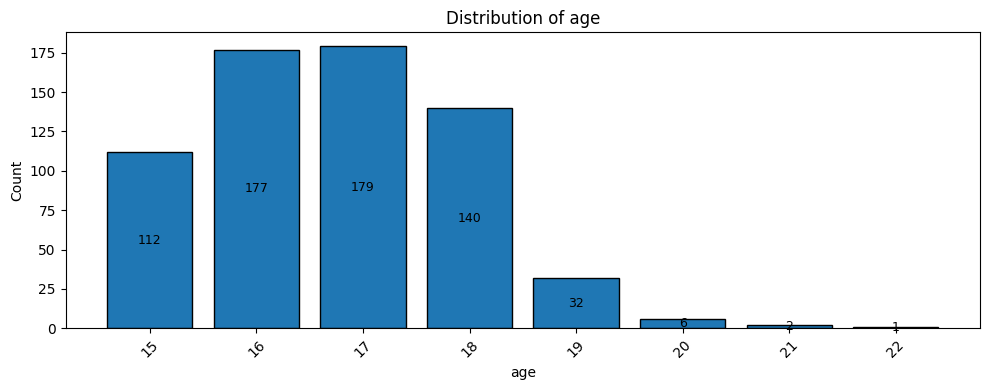

In [8]:
#Age (P)
from visualization.explore_discrete import plot_discrete_distribution
plot_discrete_distribution(df_port, ['age'])

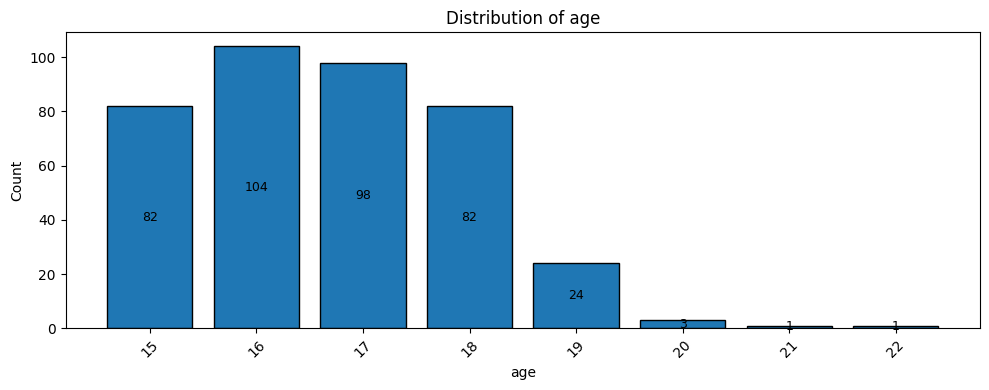

In [9]:
#Age (M)
plot_discrete_distribution(df_math, ['age'])

The **age** distributions in the Portuguese and Mathematics datasets are very similar, with both being strongly concentrated between 15 and 18 years old. In both subjects, only a small number of older students (up to 22 years) are observed, likely reflecting grade repetition, suggesting that age-related patterns are consistent across disciplines.

The **gender** distribution is very similar in the Portuguese and Mathematics datasets, with a slight predominance of female students in both subjects. The distribution of home **address** type (urban vs. rural) is nearly identical across the Portuguese and Mathematics datasets, with urban residence being the most common in both cases.

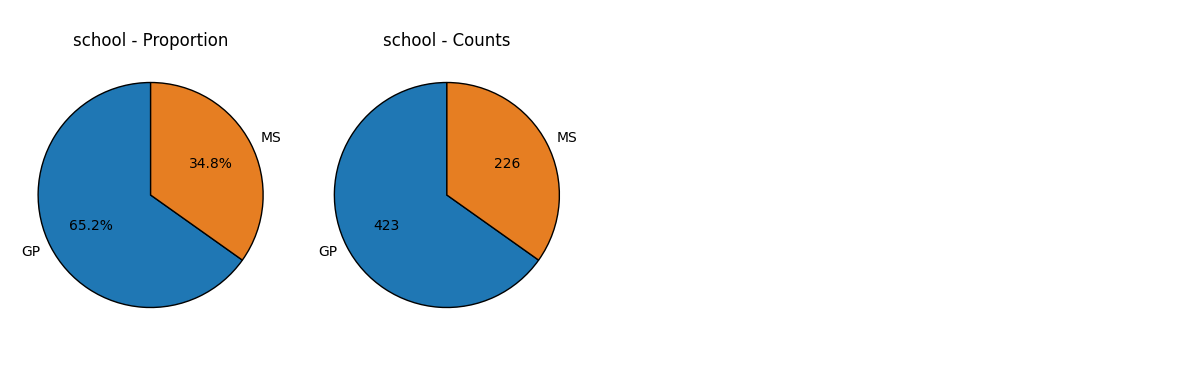

In [10]:
#School (P)
from visualization.explore_binary import plot_binary_distribution
plot_binary_distribution(df_port, ['school'])

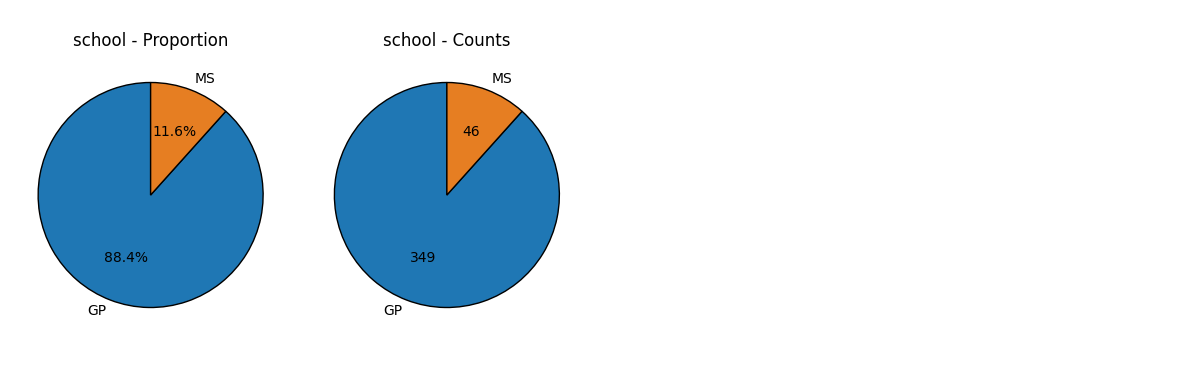

In [11]:
#School (M)
plot_binary_distribution(df_math, ['school'])

The distribution of students across **schools** (GP and MS) is similar in the Portuguese and Mathematics datasets, with GP being the dominant school in both subjects. This consistency suggests that school-level representation does not differ meaningfully between the two datasets and is unlikely to confound subject-specific performance comparisons.

### Family structure and socio-economic background

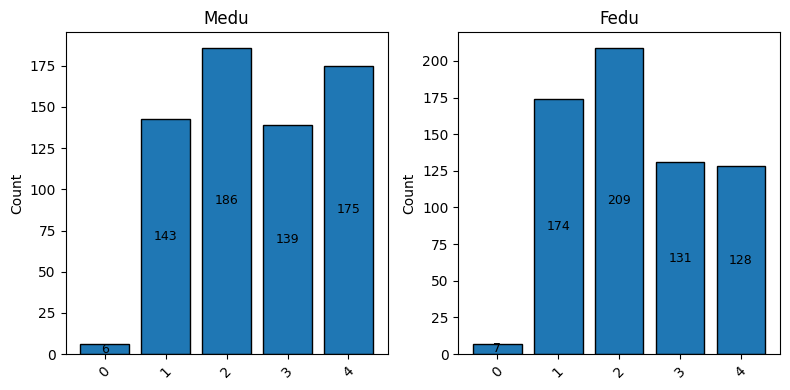

In [12]:
#Medu (Mother's Education) and Fedu (Father's Education) (P)
parents_edu_cols = ['Medu', 'Fedu']

from visualization.explore_discrete import plot_discrete_distribution_grid
plot_discrete_distribution_grid(df_port, parents_edu_cols, figsize = (8, 4))

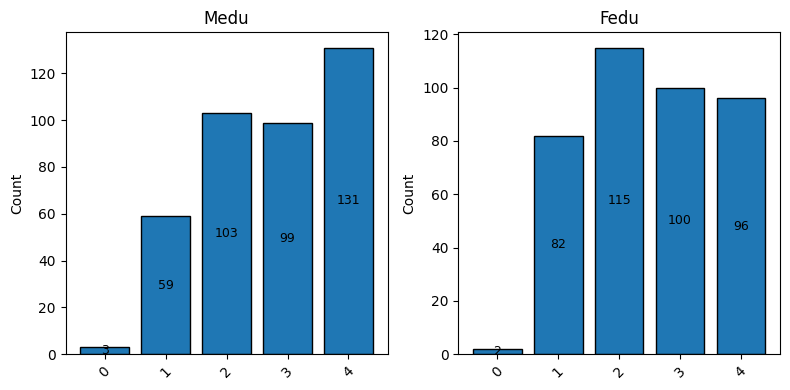

In [13]:
#Medu and Fedu (M)
plot_discrete_distribution_grid(df_math, parents_edu_cols, figsize = (8, 4))

In both the Portuguese and Mathematics datasets, **mother’s and father’s education** levels exhibit similar distributions within each subject, with maternal education (Medu) being slightly higher on average than paternal education (Fedu). However, both parental education variables are consistently higher in the Mathematics dataset than in the Portuguese dataset, suggesting a modest but systematic socio-economic difference between the two student populations.

The remaining family structure variables (**famsize, Pstatus, Mjob, Fjob,** and **guardian**) display very similar distributions across the Portuguese and Mathematics datasets. No major differences or anomalies are observed between subjects, indicating that family composition, parental occupations, and guardian type are largely consistent across both student populations.

### School context and academic support

Within the school context and academic support variables, the majority of features display highly similar univariate distributions across the P and M datasets. The reasons for school choice (**reason**), home-to-school travel time (**traveltime**), access to school support (**schoolsup**), family educational support (**famsup**), attendance at nursery school (**nursery**), intention to pursue higher education (**higher**), and home internet access (**internet**) show no meaningful distributional differences between subjects and present stable, homogeneous patterns.

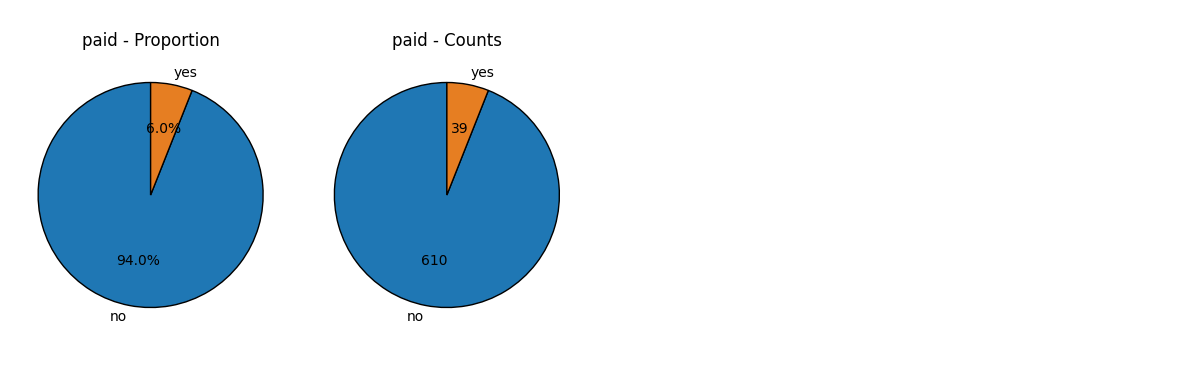

In [14]:
#Paid (P)
plot_binary_distribution(df_port, ['paid'])

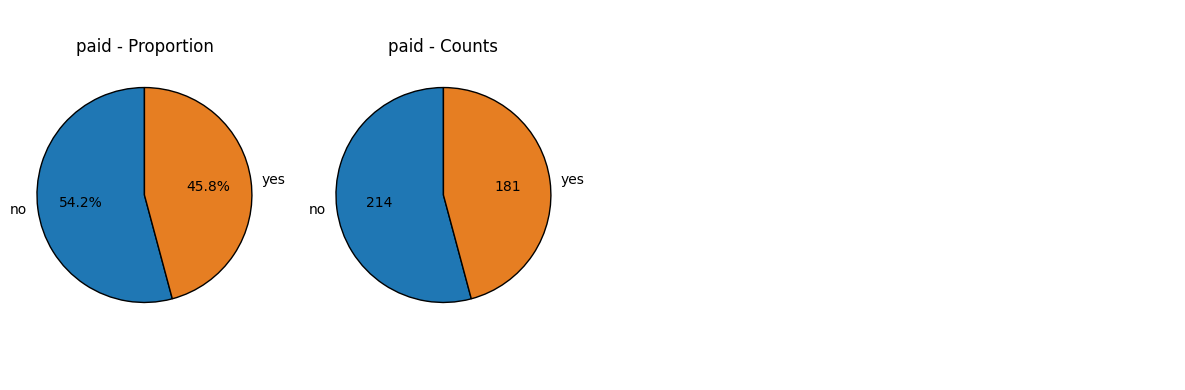

In [15]:
#Paid (M)
plot_binary_distribution(df_math, ['paid'])

In contrast, the variable **paid** exhibits a noticeable difference between the two datasets. Students in the M dataset are more likely to report participation in paid extra classes compared to students in the P dataset, suggesting a higher prevalence of private academic support in mathematics. This difference may reflect subject-specific learning demands or differential investment in external academic assistance.

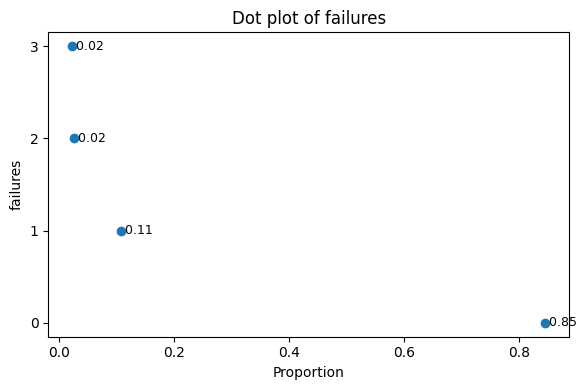

In [16]:
#Failures (P)
from visualization.explore_discrete import plot_discrete_dot_distribution
plot_discrete_dot_distribution(df_port, ['failures'], figsize = (6,4))

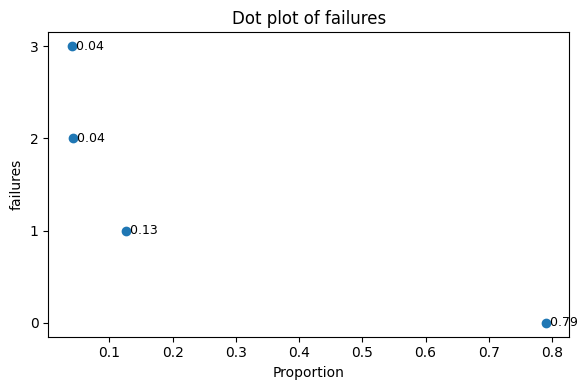

In [17]:
#Failures (M)
plot_discrete_dot_distribution(df_math, ['failures'], figsize = (6,4))

The distribution of prior academic failures differs between the P and M datasets, with the Mathematics dataset showing a higher proportion of students reporting one or more past **failures**. This suggests greater academic difficulty or stricter evaluation dynamics in mathematics, while the Portuguese dataset is more heavily concentrated around students with no prior failures.

### Student behavior and lifestyle

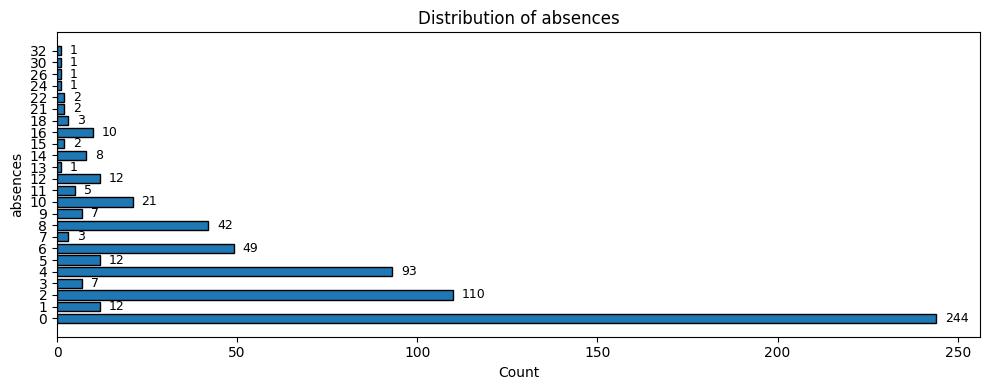

In [18]:
#Absences (P)
plot_discrete_distribution(df_port, ['absences'])

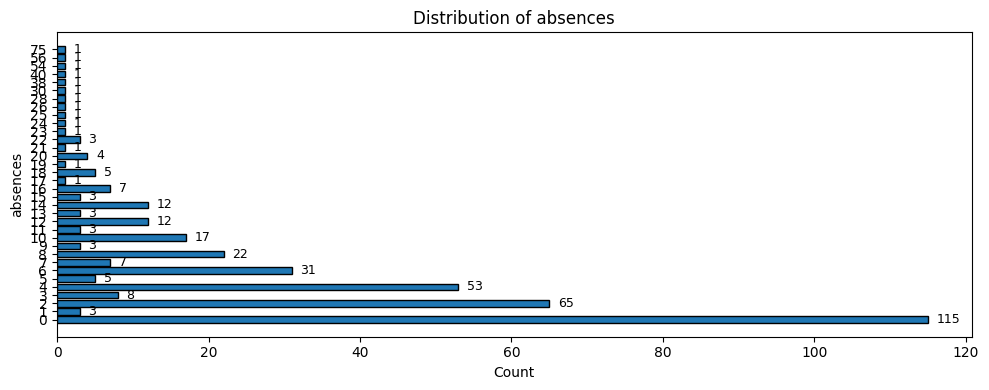

In [19]:
#Absences (M)
plot_discrete_distribution(df_math, ['absences'])

The distribution of student absences differs noticeably between the Portuguese and Mathematics datasets. While both subjects show a concentration of students with low numbers of **absences**, the Mathematics dataset exhibits a wider spread and a heavier right tail, with more students accumulating high absence counts. This indicates greater variability in attendance patterns among mathematics students and suggests the presence of atypical or extreme absence behaviors compared to the Portuguese dataset.

The remaining student behavior and lifestyle variables exhibit very similar distributions in both the P and M datasets. Most students report low to moderate weekly study time (**studytime**), limited participation in extra-curricular activities (**activities**), moderate free time (**freetime**), and comparable socializing habits (**goout**) and romantic involvement (**romantic**). No notable differences or anomalies are observed between subjects, indicating that these lifestyle and behavioral patterns are largely consistent across the two student populations.

### Health and well-being

The health and well-being variables, including **health**, **Dalc** (workday alcohol consumption), **Walc** (weekend alcohol consumption) and **famrel** (family relationship quality), show very similar distributions across the Portuguese and Mathematics datasets. Most students report good overall health, low to moderate alcohol consumption on weekdays and weekends, and generally positive family relationships. No notable differences or anomalies are observed between subjects, indicating that students’ health, alcohol use, and family support are largely consistent across the two populations.

### Academic performance

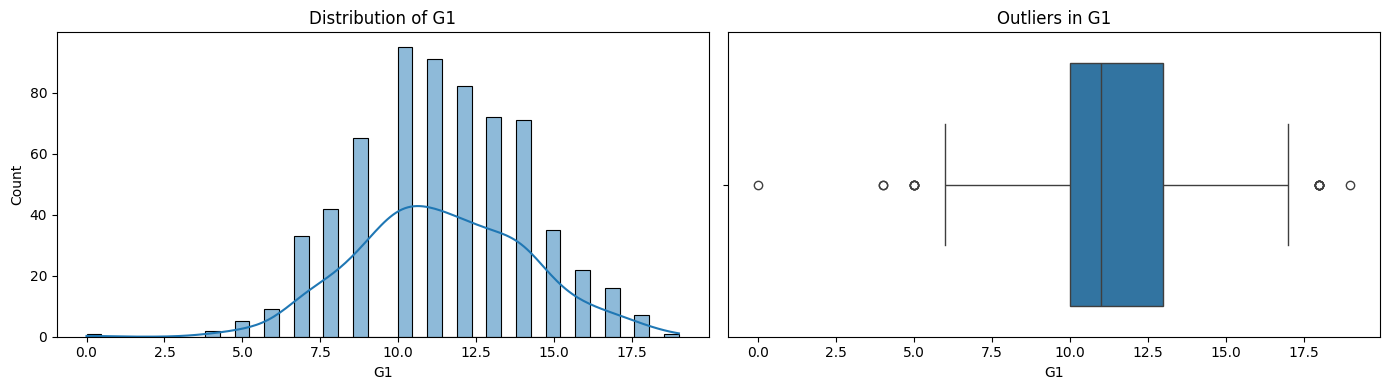

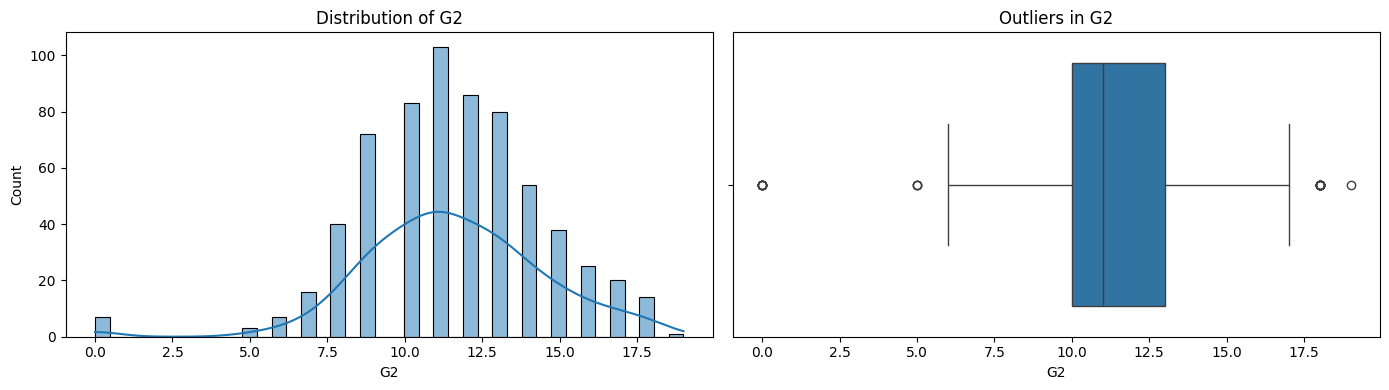

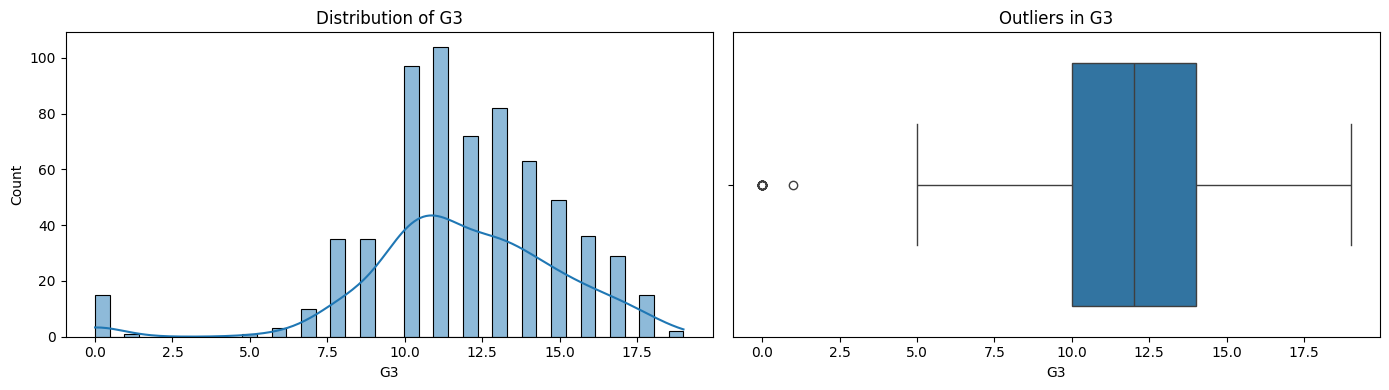

In [20]:
#G1-G2-G3 (P)
from visualization.explore_continuous import plot_numeric_distribution
plot_numeric_distribution(df_port, performance_cols)

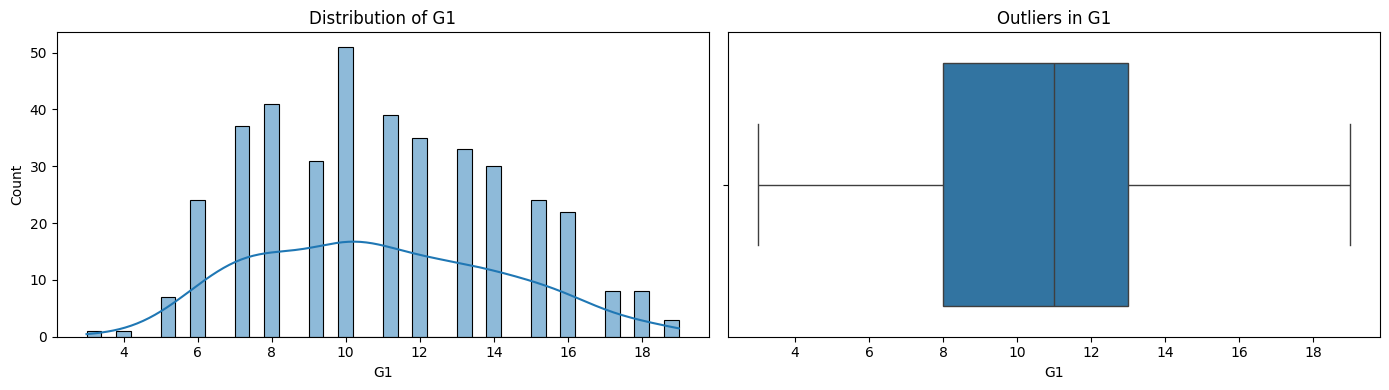

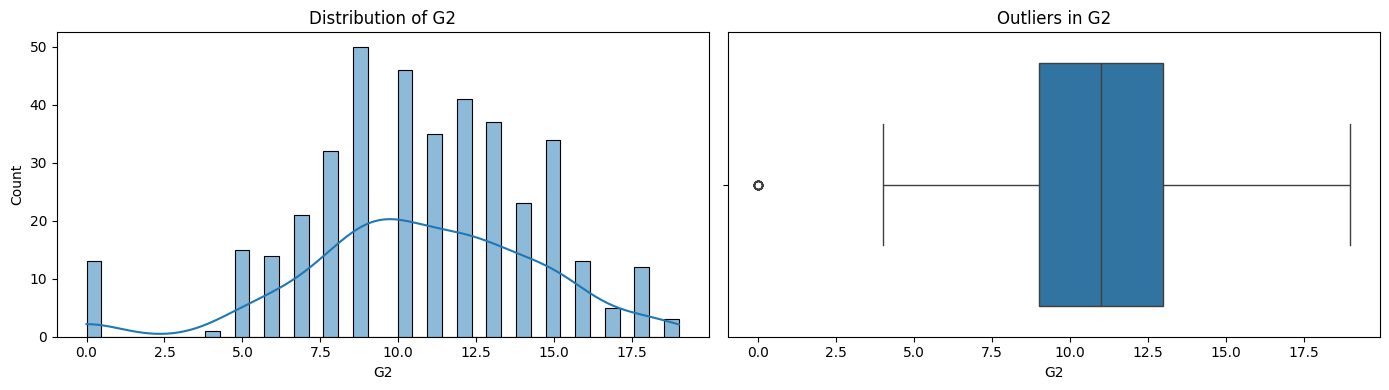

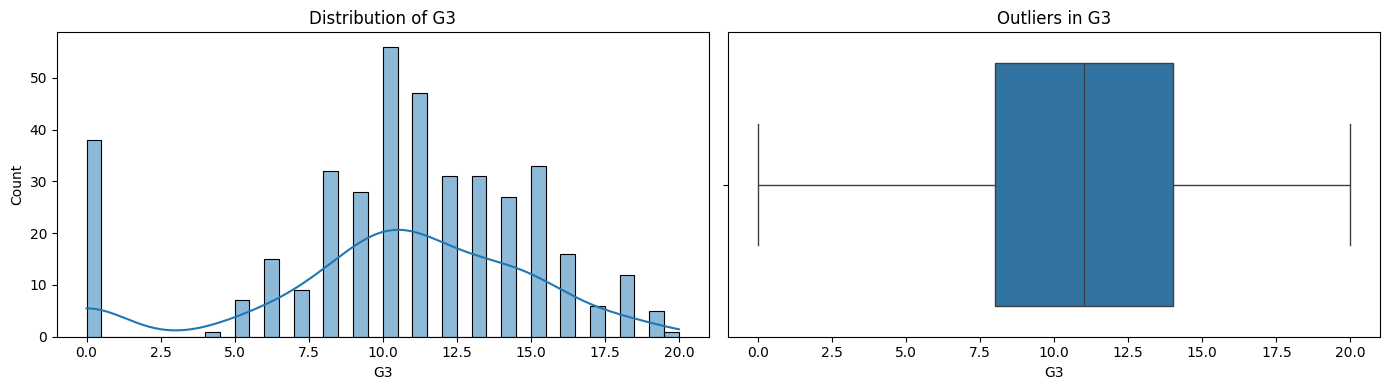

In [21]:
#G1-G2-G3 (M)
plot_numeric_distribution(df_math, performance_cols)

The academic performance variables **G1**, **G2**, and **G3** represent students’ grades in the first period, second period, and at the end of the school year, respectively. In both the P and M datasets, the distributions of these grades are concentrated around the middle range, with most students scoring between 10 and 15. While there are some variations in extreme scores (outliers), the overall patterns are similar between subjects.

## 1.4-Bivariate Analysis

### Correlation Analysis

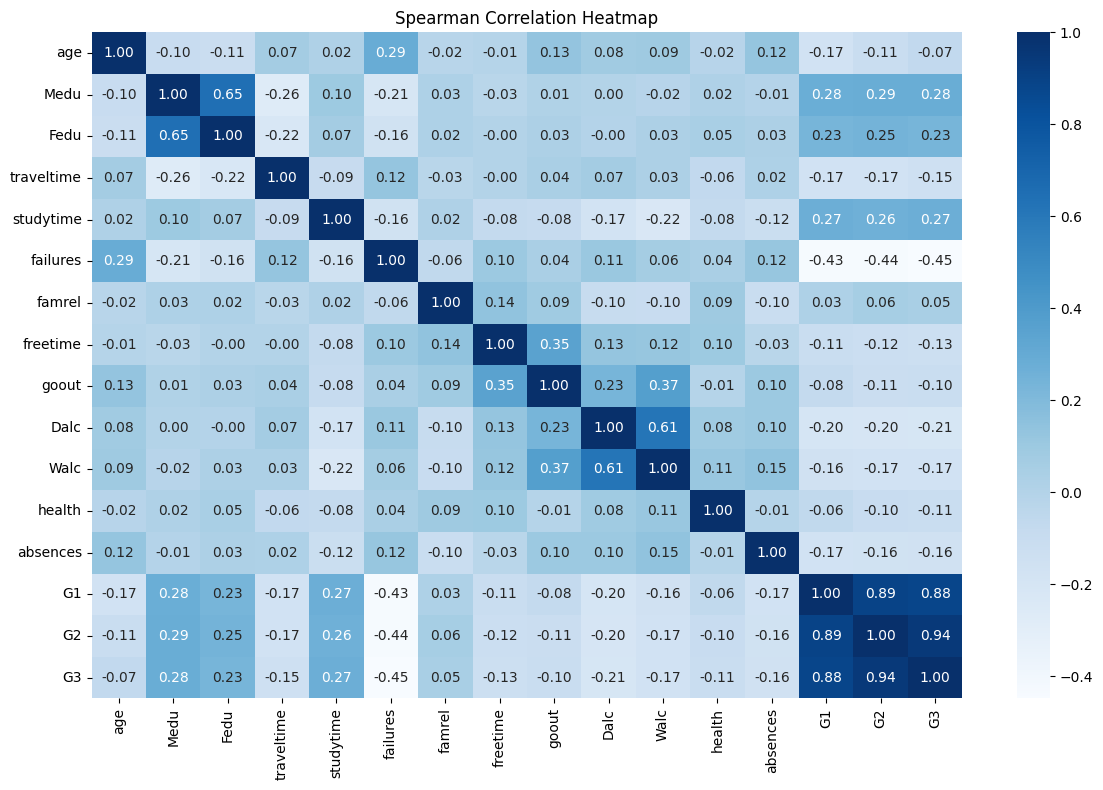

In [22]:
#Correlation Heatmap (P)
from visualization.explore_continuous import plot_correlation_heatmap
plot_correlation_heatmap(df_port, numeric_cols)

- **G1, G2, G3**: very strongly correlated with each other (0.88–0.94) → consistent academic progression.  
- **Medu and Fedu**: correlated with each other (0.65) and positively with grades (0.23–0.29) → moderate influence of parental education.  
- **Failures**: negatively correlated with all grades (−0.43 to −0.45) → past academic failures impact performance.  
- **Absences**: slightly negatively correlated with G1–G3 (−0.16 to −0.17) → more absences associated with slightly lower performance.  
- **Dalc and Walc**: weak negative correlations with grades (−0.16 to −0.21) → alcohol consumption has a minor but detectable effect.  
- **Other variables (age, health, famrel, freetime, goout)**: very weak or negligible correlations with grades → limited influence on academic performance.


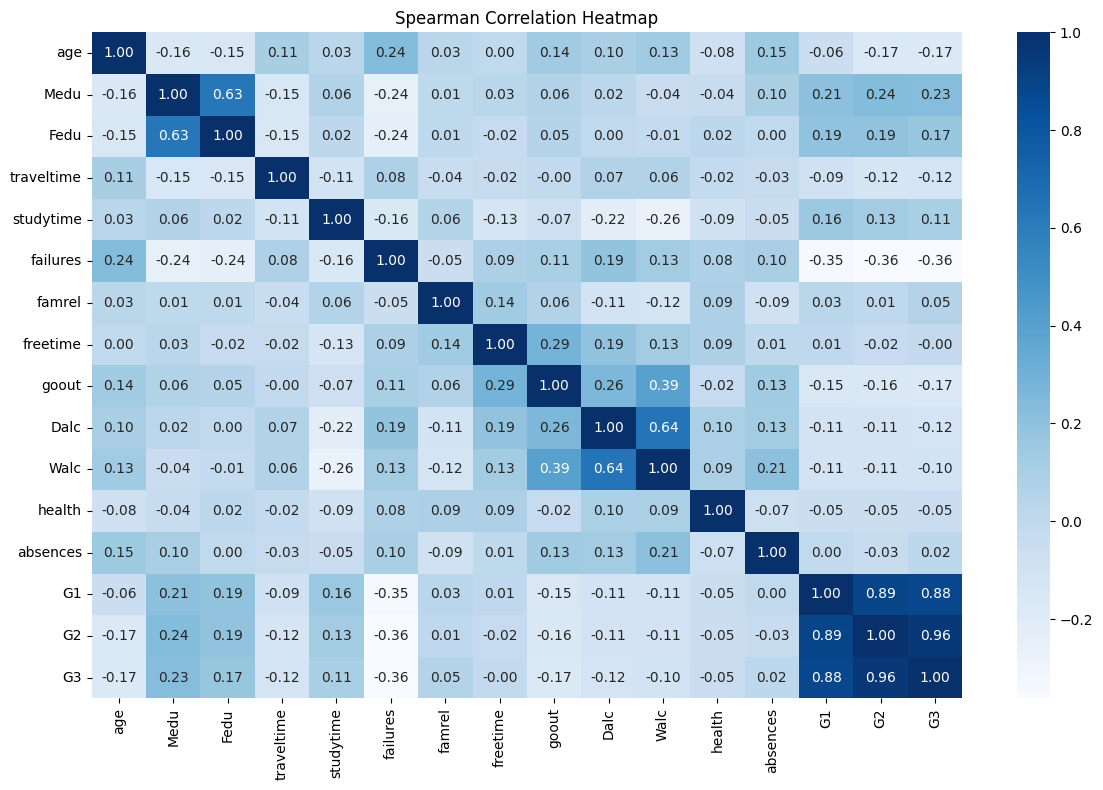

In [23]:
#Correlation Heatmap (M)
from visualization.explore_continuous import plot_correlation_heatmap
plot_correlation_heatmap(df_math, numeric_cols)

- **G1, G2, G3**: very strongly correlated (0.88–0.96) → stable academic progression across periods.
- **Medu and Fedu**: correlated with each other (0.63) and moderately with grades (0.17–0.24) → parental education has a positive but modest effect.  
- **Failures**: negatively correlated with grades (−0.35 to −0.36) → past failures reduce academic performance.  
- **Absences**: negligible correlations with grades (−0.03 to 0.02) → attendance has little effect in this dataset.  
- **Dalc and Walc**: weak negative correlations with grades (−0.10 to −0.12) → minor influence of alcohol consumption.  
- **Other variables (age, traveltime, studytime, famrel, freetime, goout, health)**: weak or very weak correlations with grades → minimal direct impact on academic performance.


**Compared to the Portuguese dataset, the Math dataset shows slightly stronger correlations between intermediate grades (G1, G2) and final grades (G3)**, while overall patterns of parental influence, failures, and lifestyle factors are similar across both subjects.

After analyzing correlations, we prioritize variables that show meaningful relationships with final grades (G3) or represent potentially influential factors. Our plan focuses on numeric predictors, risk indicators, and key categorical features, using targeted visualizations to uncover patterns and interactions efficiently.


| Category | Variables | Purpose / Hypothesis | Visualization |
|----------|-----------|--------------------|---------------|
| **1-Demographic characteristics** | age, sex, school | Explore if age, sex, or school relate to grades | Boxplot |
| **2-Family structure and socio-economic background** | Medu, Fedu | Explore parental education influence on grades | Violinplot |
| **3-School context and academic support** | traveltime, paid, failures, higher | Examine effect of travel time, extra classes, and other on grades | Violinplot/Swarmplot |
| **4-Student behavior and lifestyle** | studytime, romantic, absences | Examine how study habits, relationships, and attendance affect grades | Boxplot |
| **5-Health and well-being** | Dalc, Walc | Alcohol’s impact on grades | Swarmplot |
| **6-Academic performance** | G1, G2, G3 | Explore sequential relationships between grades | Pairplot/Line plot |


To make the bivariate visualizations more concise and easier to interpret, the datasets are restructured to enable combined plots. By aligning Portuguese and Math data within a single graph for the same variables (e.g., Medu vs. G3, Fedu vs. G3), patterns can be directly compared across subjects. This approach helps reducing visual clutter, facilitates cross-subject comparison, and highlights similarities and differences more clearly.

To further improve readability, most multivariate visualizations focus on the final grade (G3), which serves as a summary indicator of academic performance. Analyses are nevertheless conducted for G1, G2, and G3, and any relevant differences or noteworthy patterns observed at earlier stages are explicitly discussed in the text.

In [24]:
#Add subject identifier
df_port_combined = df_port.copy()
df_port_combined['subject'] = 'Portuguese'

df_math_combined = df_math.copy()
df_math_combined['subject'] = 'Math'

#Concatenate datasets
df_combined = pd.concat(
    [df_port_combined, df_math_combined],
    axis = 0,
    ignore_index = True
)

### Demographics characteristics

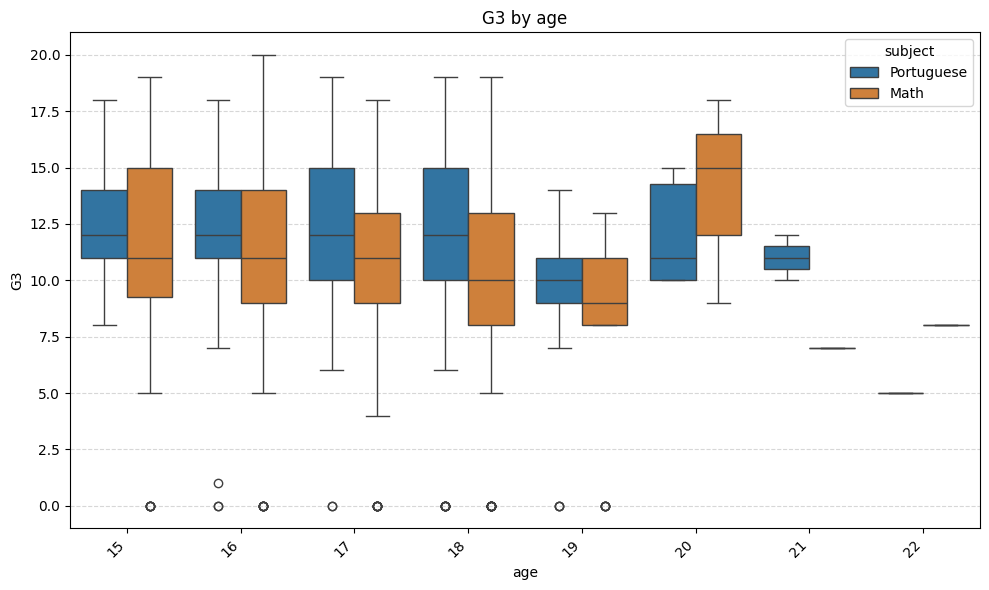

In [25]:
#Age
from visualization.explore_continuous import plot_box_grid
plot_box_grid(df_combined, ['G3'], ['age'], hue_col = 'subject')

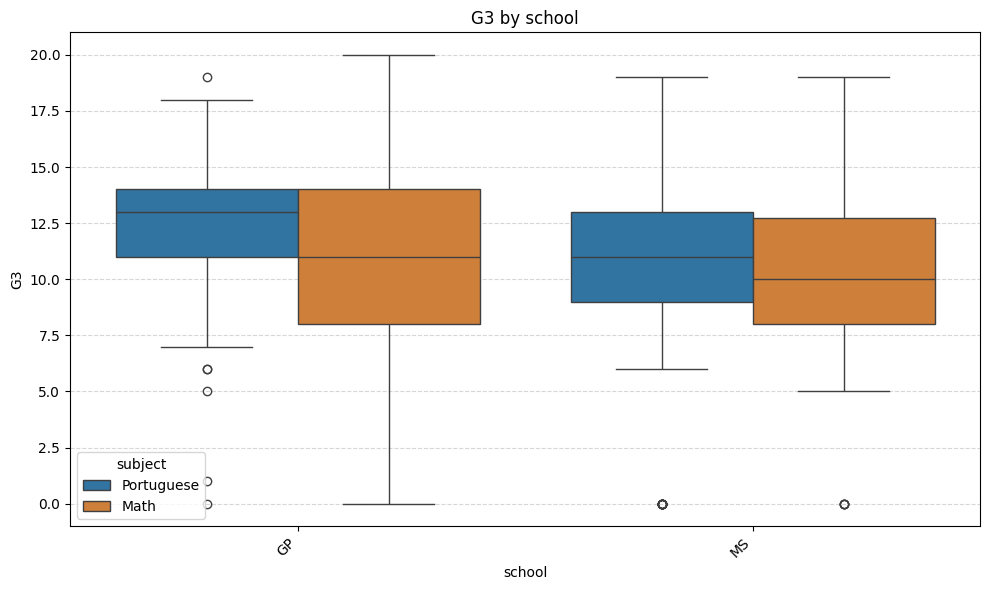

In [26]:
#School
plot_box_grid(df_combined, ['G3'], ['school'], hue_col = 'subject')

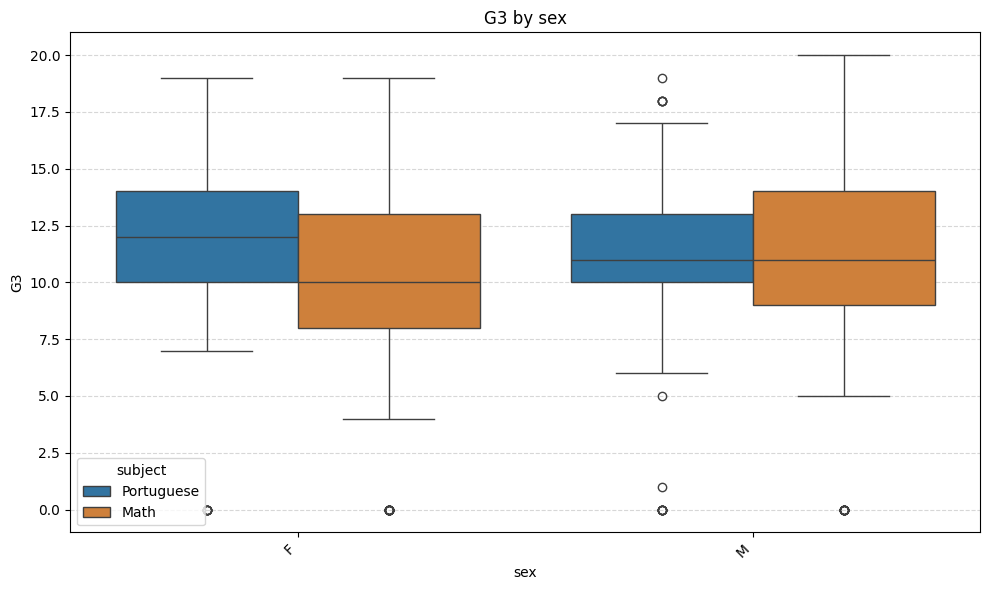

In [27]:
#Sex
plot_box_grid(df_combined, ['G3'], ['sex'], hue_col = 'subject')

**Age vs Grades:**
  - Younger students (15–17) tend to have slightly higher average grades in G1 and G2 compared to older students (18+).  
  - Grades drop noticeably for students aged 19+, especially in G1 and G3.  
  - Median grades remain fairly stable around 11–12 for ages 15–18, indicating consistent performance among the main student group.  

**School (GP vs MS) vs Grades:**
  - Students from GP consistently have higher mean grades across all three assessments (G1: 11.99, G2: 12.14, G3: 12.58) compared to MS (G1: 10.30, G2: 10.50, G3: 10.65).  
  - The gap between schools persists and slightly increases from G1 to G3, suggesting school context has a moderate influence on academic performance.  

**Sex vs Grades:**
  - Female students generally achieve higher mean grades than male students in all three grades (G1: 11.64 vs 11.06, G2: 11.82 vs 11.21, G3: 12.25 vs 11.41).  
  - The difference is consistent across G1–G3, indicating a stable gender effect on academic performance.  
  - Medians also reflect this trend, reinforcing that the effect is not driven by outliers.


### Family structure and socio-economic background

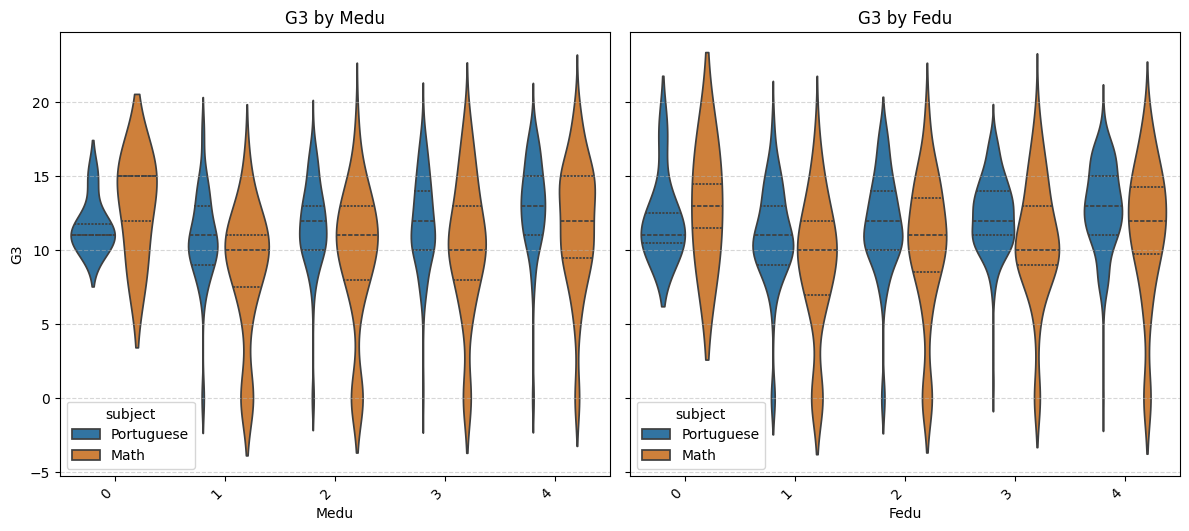

In [28]:
#Medu/Fedu
#Define columns to plot
parent_edu_cols = ['Medu', 'Fedu']

from visualization.explore_continuous import plot_violin_grid
plot_violin_grid(df_combined, ['G3'], parent_edu_cols, hue_col = 'subject')

**Father’s Education (Fedu) vs Grades by Subject:**
- Grades increase with higher father education for both Portuguese and Math.
- Low Fedu (0–1) → lower mean grades; high Fedu (4) → highest grades.
- Medians follow the same trend; variation is larger for middle education levels (1–3).

**Mother’s Education (Medu) vs Grades by Subject:**
- Similar pattern: higher Medu → higher grades.
- Low Medu (0–1) → lower grades; high Medu (4) → highest grades.
- Trend slightly stronger in G3, suggesting cumulative effect.

**Medu/Fedu vs Grades by Subject:**
- Parental education positively influences grades across G1–G3 for both subjects.
- Effect is stable across grades and not driven by outliers.
- Portuguese vs Math trends are broadly similar.


### School context and academic support

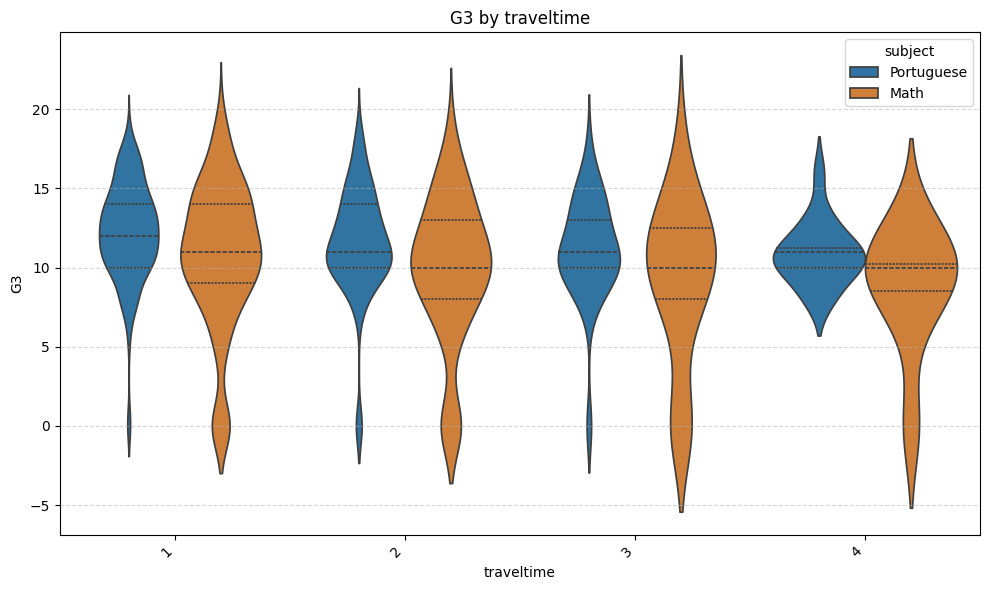

In [29]:
#Traveltime
plot_violin_grid(df_combined, ['G3'], ['traveltime'], 'subject')

**Travel Time vs Grades**
- Students with shorter travel times (1–2) generally have higher mean and median grades across G1–G3.  
- As travel time increases (3–4), grades tend to drop slightly, especially for G3 (mean: 10.17–10.60 for traveltime 4–3).  
- Variation (std) is fairly stable across travel time categories; smaller groups (traveltime 4) show slightly less variation.  
- Overall, longer travel times may modestly reduce performance, but the effect is not very pronounced.  

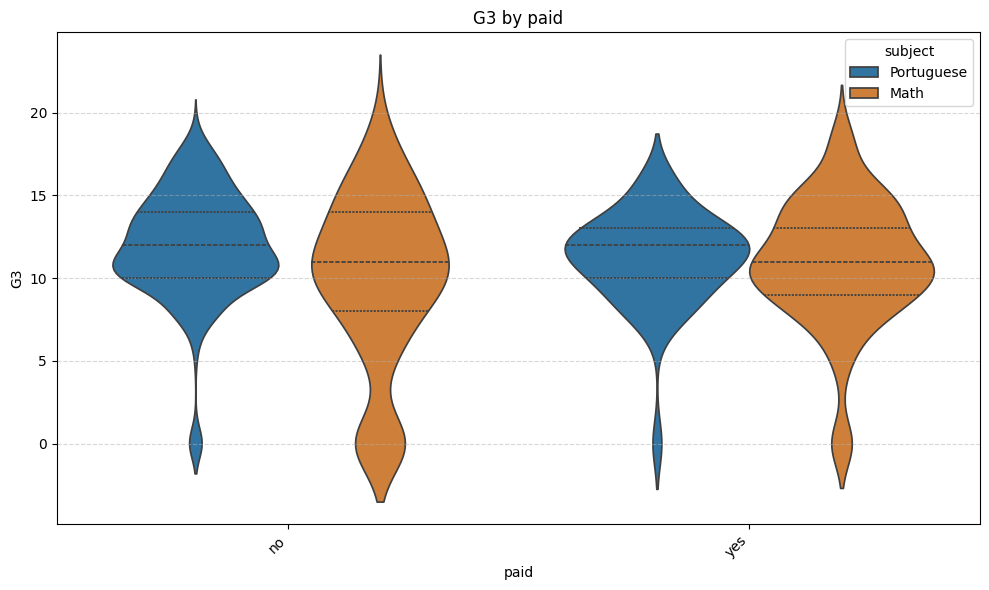

In [30]:
#Paid
plot_violin_grid(df_combined, ['G3'], ['paid'], 'subject')

**Paid Classes vs Grades**

- Students who did not take paid classes ("no") have slightly higher mean and median grades than those who did ("yes"), across G1–G3.  
- Differences are modest (G3 mean: 11.44 vs 10.97), suggesting paid classes do not guarantee higher performance in this dataset.  
- Variation (std) is similar between groups, indicating comparable grade spread regardless of extra classes.  
- Overall, taking paid classes does not show a strong or consistent effect on grades.  

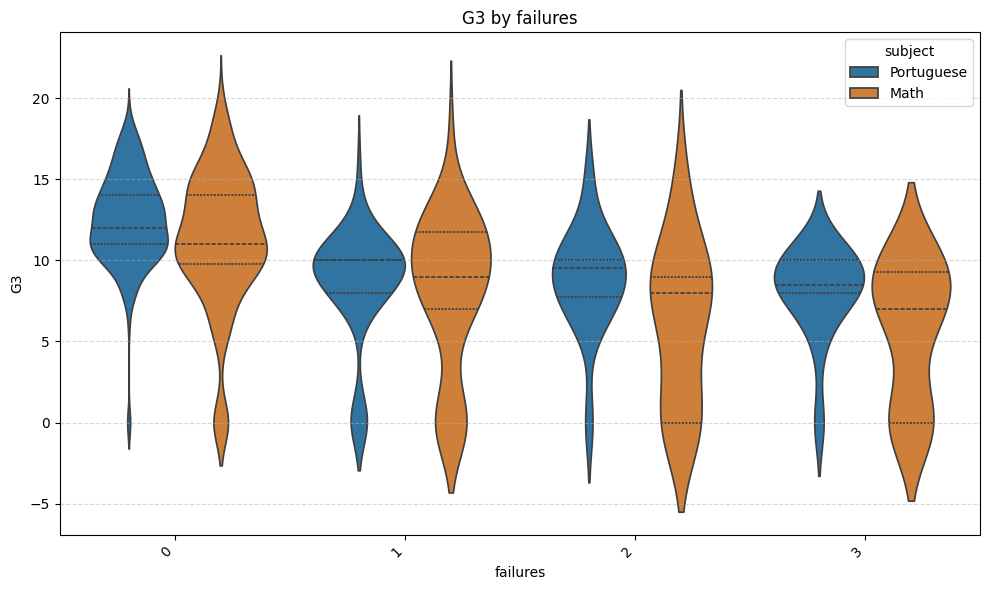

In [31]:
#Failures
plot_violin_grid(df_combined, ['G3'], ['failures'], 'subject')

**Failures vs Grades**

- Students with no past failures ("0") have the highest mean and median grades across G1–G3.  
- Grades decline steadily as the number of past failures increases, with G3 means dropping from 12.05 (0 failures) to 6.80 (3 failures).  
- Variation (std) in grades increases slightly for students with multiple failures, especially for G3, indicating some students partially recover while others continue to struggle.  
- Overall, past failures are a strong risk factor for lower academic performance throughout the school year.


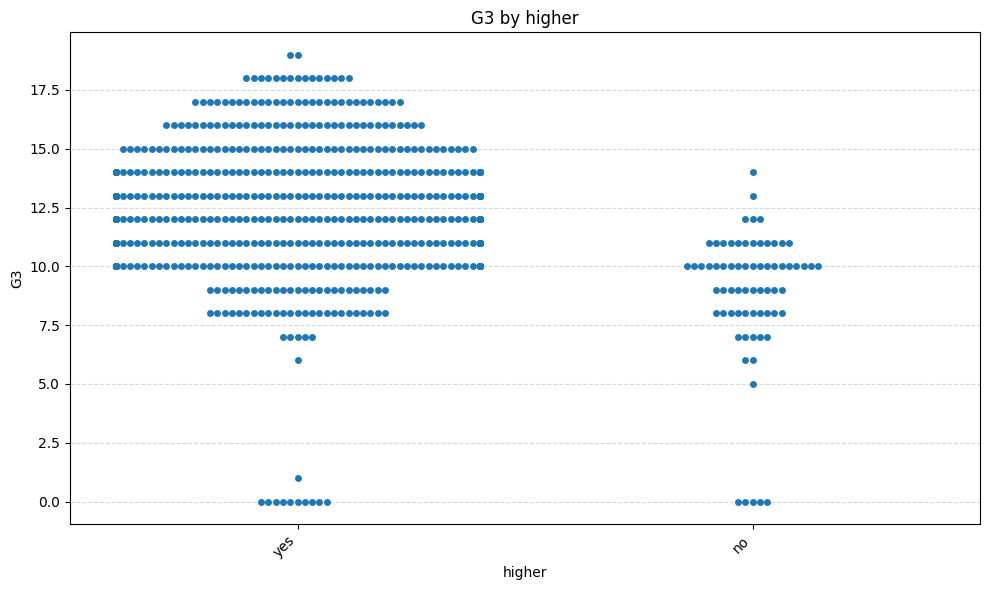

In [32]:
#Higher (P)
from visualization.explore_continuous import plot_swarm_grid
plot_swarm_grid(df_port, ['G3'], ['higher'])

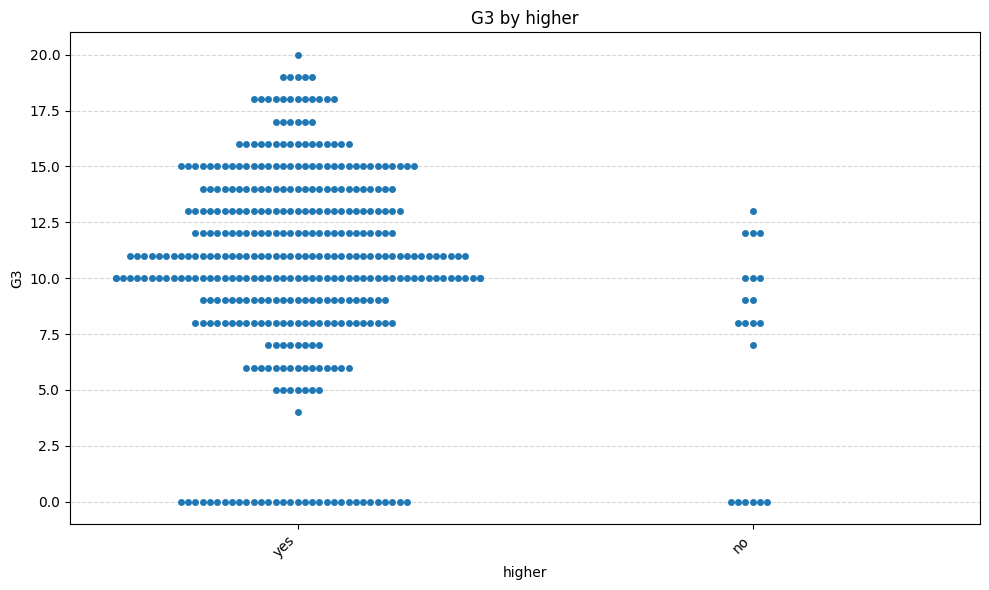

In [33]:
#Higher (M)
from visualization.explore_continuous import plot_swarm_grid
plot_swarm_grid(df_math, ['G3'], ['higher'])

**Higher Education Intention (higher) vs Grades**

- Students planning to pursue higher education (higher = yes) consistently score higher across G1, G2, and G3 in both Math and Portuguese.
- The grade gap is largest in Math G3 (+3.8 points: 10.6 vs 6.8) and substantial in Portuguese (+3.5 points: 12.3 vs 8.8), showing a clear advantage for motivated students.
- Students with no intention for higher education show lower and more variable grades, particularly in Math, indicating both lower performance and higher inconsistency.
- Trend is stable across grades, suggesting that the effect of higher intention accumulates or persists throughout the school year.

### Student behavior and lifestyle

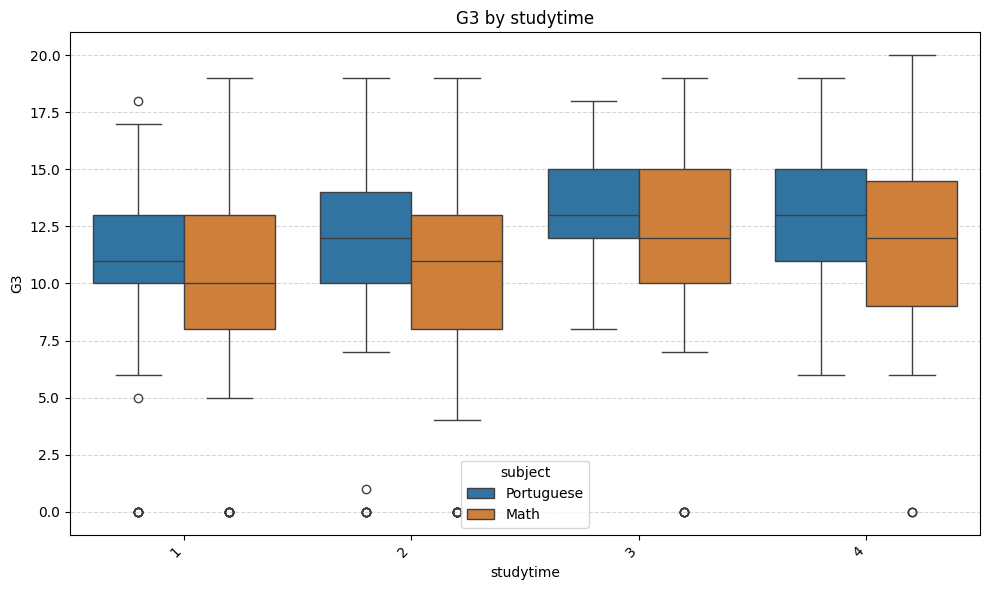

In [34]:
#Studytime
plot_box_grid(df_combined, ['G3'], ['studytime'], hue_col = 'subject')

**Studytime vs Grades**

- Higher studytime generally corresponds to higher mean and median grades across G1–G3.
- Students with 3–4 studytime units show the highest averages (G3 mean: ~12.3–12.5).
- Variation (std) is similar across groups, indicating consistent grade spread regardless of studytime.
- Overall, increased studytime is associated with slightly better performance, but differences are modest.

**Absences vs Grades**

- Mean and median grades do not show a clear linear trend with absences; some students with higher absences still achieve high grades.
- G3 averages peak around 1–7 absences (mean ~12–12.5) and fluctuate at higher absence levels.
- Variation (std) is larger for extreme absence values, suggesting more diverse outcomes among students with very low or very high absences.
- Overall, absences do not show a strong or consistent effect on grades.

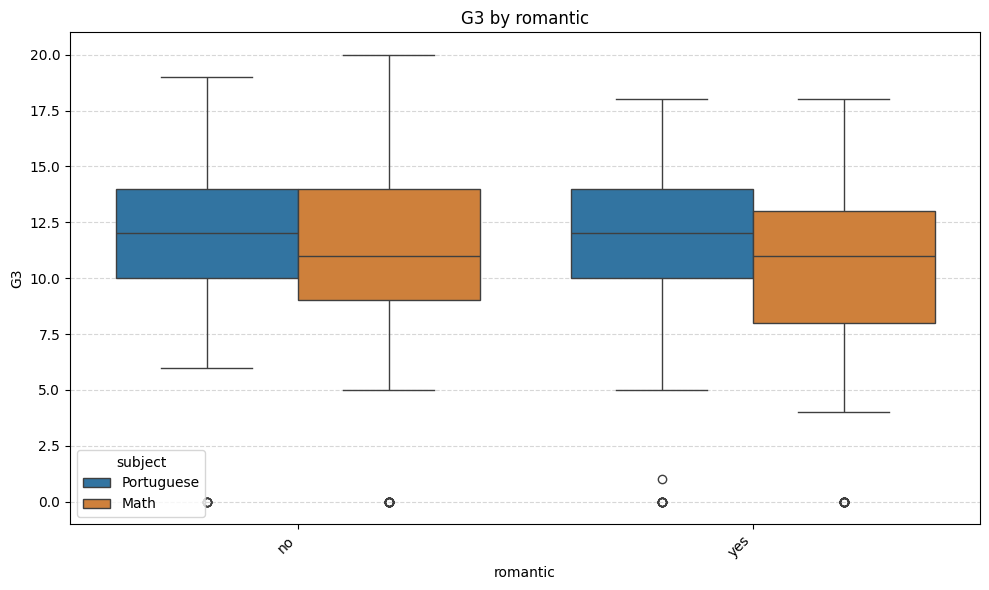

In [35]:
#Romantic
plot_box_grid(df_combined, ['G3'], ['romantic'], hue_col = 'subject')

**Romantic vs Grades**

- Students not in a relationship consistently show slightly higher mean grades across G1–G3 in Math (G3: 10.84 vs 9.58) and Portuguese (G3: 12.13 vs 11.52).
- Median grades remain stable across all three periods, while variation is somewhat higher for students in a relationship.
- Overall, being in a relationship shows a modest negative association with academic performance throughout the school year.

### Health and Well-being

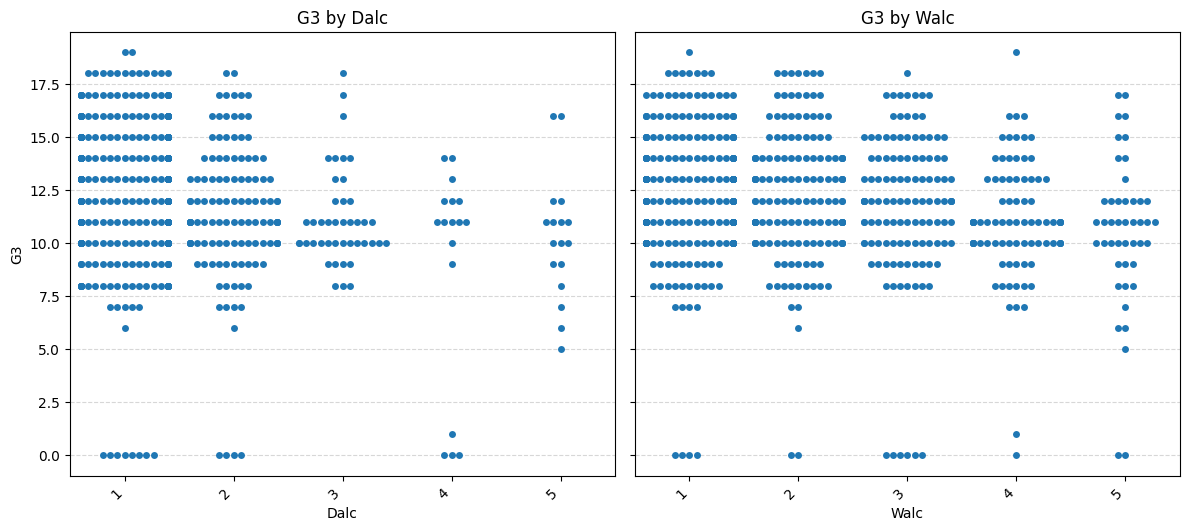

In [36]:
#Dalc/Walc (P)
#Define columns to plot 
alcohol_cols = ['Dalc', 'Walc']
plot_swarm_grid(df_port, ['G3'], alcohol_cols)

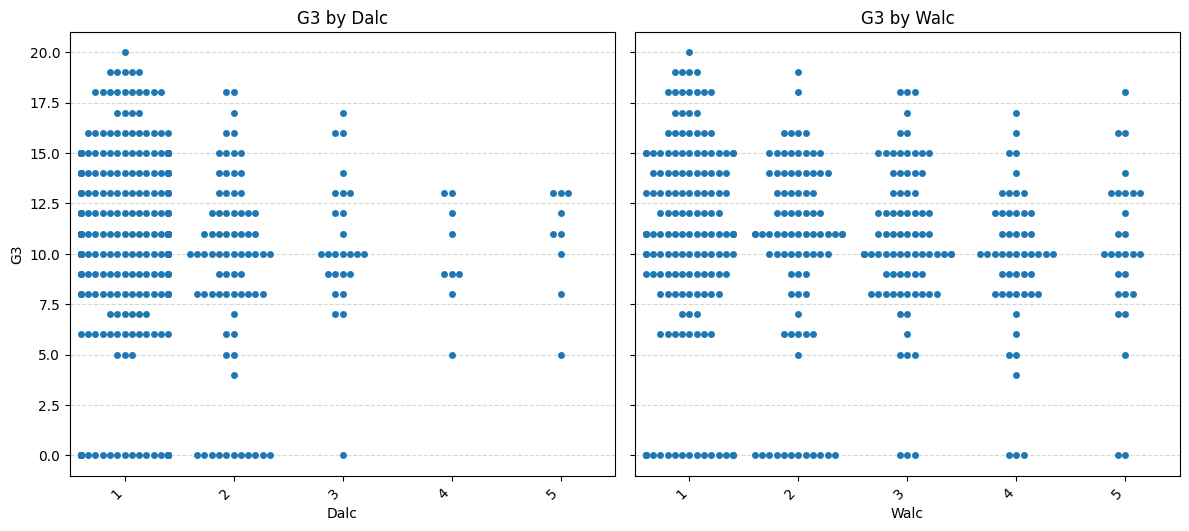

In [37]:
#Dalc/Walc (M)
plot_swarm_grid(df_math, ['G3'], alcohol_cols)

**Daily Alcohol (Dalc) vs Grades**

- Math: Grades slightly lower at Dalc 2–4 across G1–G3; extremes (1 & 5) remain around 10–10.7.
- Portuguese: Grades drop at Dalc 4, highest at Dalc 1 (~12–12.3).
- Variation moderate; middle levels slightly more variable over the three grading periods.

**Weekend Alcohol (Walc) vs Grades (G1–G3)**

- Math: Grades mostly stable (10–11) across G1–G3; no clear trend.
- Portuguese: Slight decrease at high Walc (5); highest grades at levels 1–2 (~12–12.3).

**Dalc/Walc vs Grades**

- Daily alcohol consumption shows a slightly stronger negative association with grades than weekend drinking.
- Effects are moderate, not strictly linear, and likely influenced by other factors as well.

### Academic performance

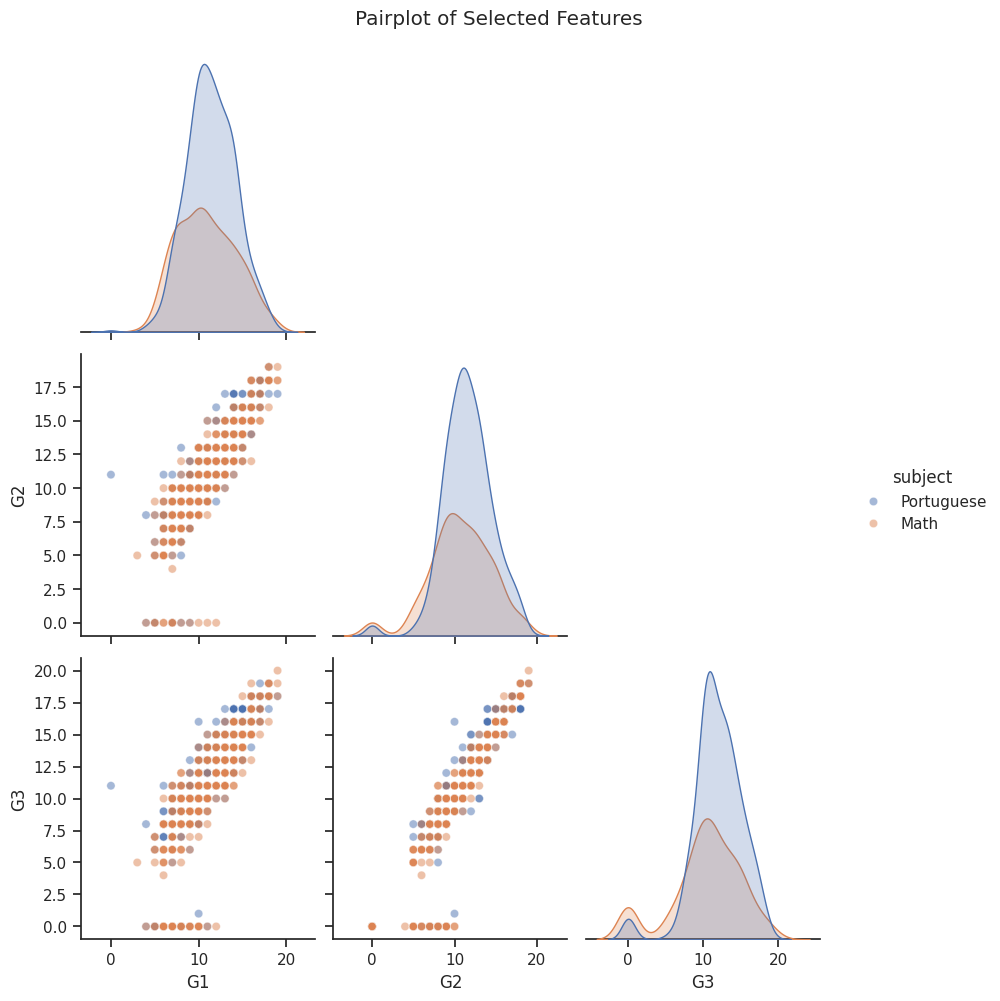

In [38]:
#G1-G2-G3 (P)
from visualization.explore_continuous import plot_pairplot
plot_pairplot(df_combined, performance_cols, hue = 'subject')


**Grades Progression (G1 → G2 → G3) by Subject**

- **Overall trend**: There is a positive correlation between consecutive grades: students with high G1 usually have high G2, and high G2 predicts high G3. The clouds of points likely slope upwards diagonally.
- **Portuguese vs Math**: Portuguese students tend to cluster slightly higher overall (G1–G3) than Math students, suggesting better overall performance.
- **Dispersion**: The spread of points increases slightly from G1 to G3, especially in Math. This indicates more variability in final grades (some students improve, others decline).
- **Consistency**: For both subjects, most points follow a diagonal trend, indicating that grades are relatively stable over time, with few extreme jumps or drops.
- **Outliers**: Some scattered points far from the main cluster may represent students who significantly outperform or underperform compared to their peers in a particular grade.

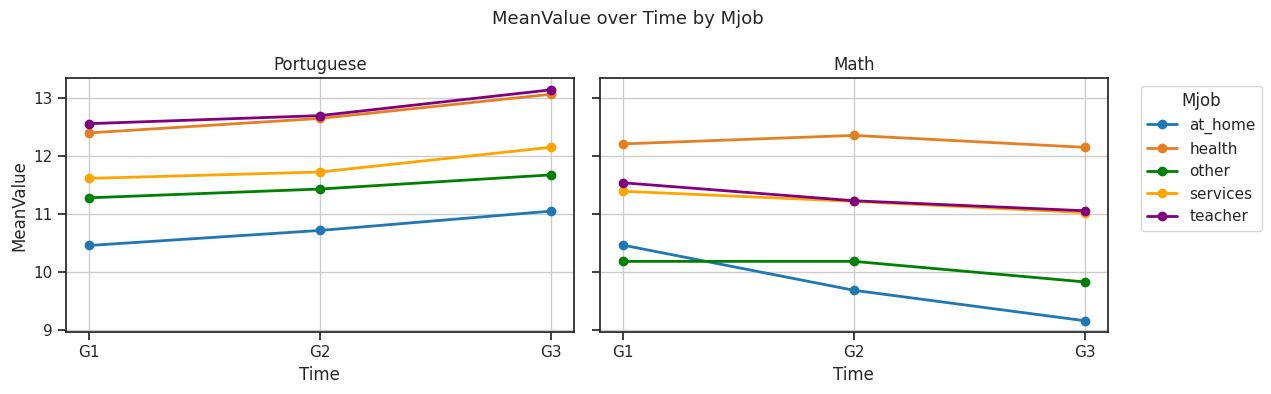

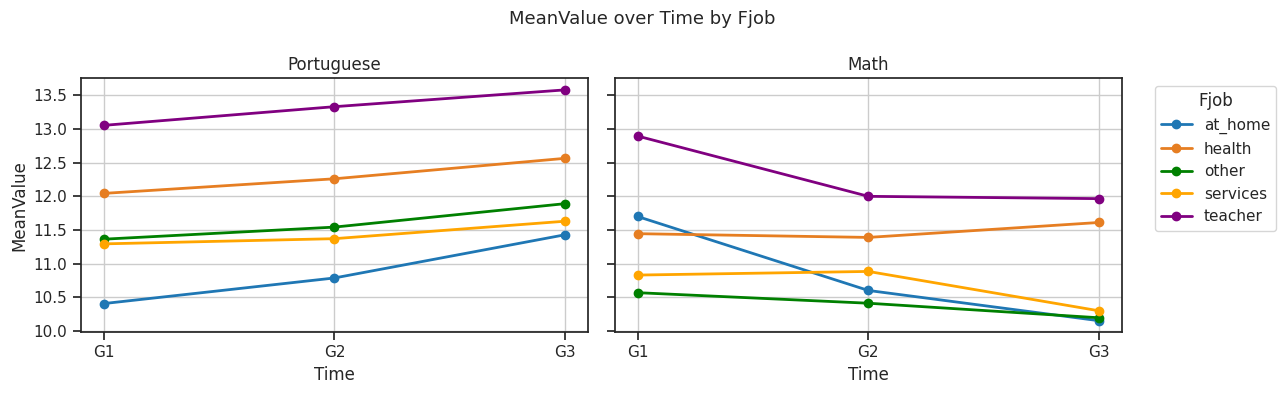

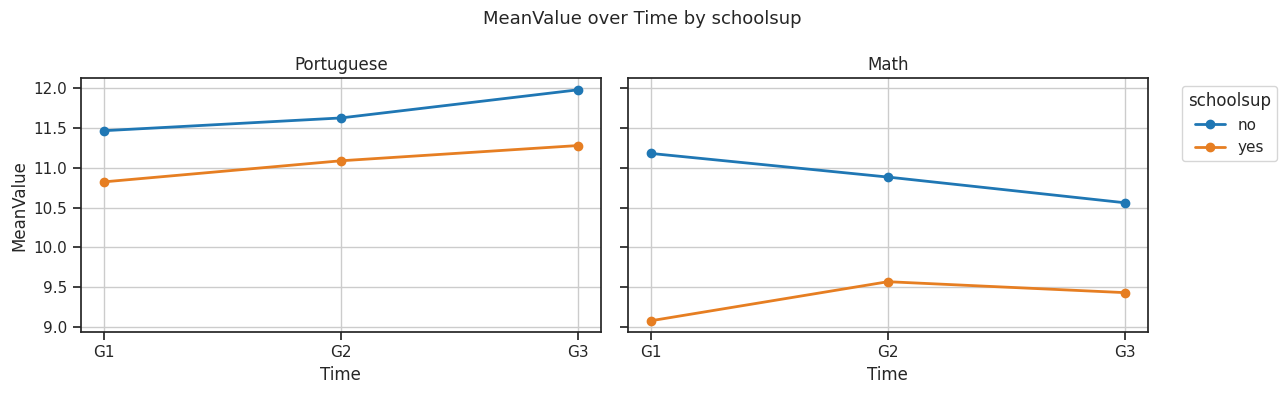

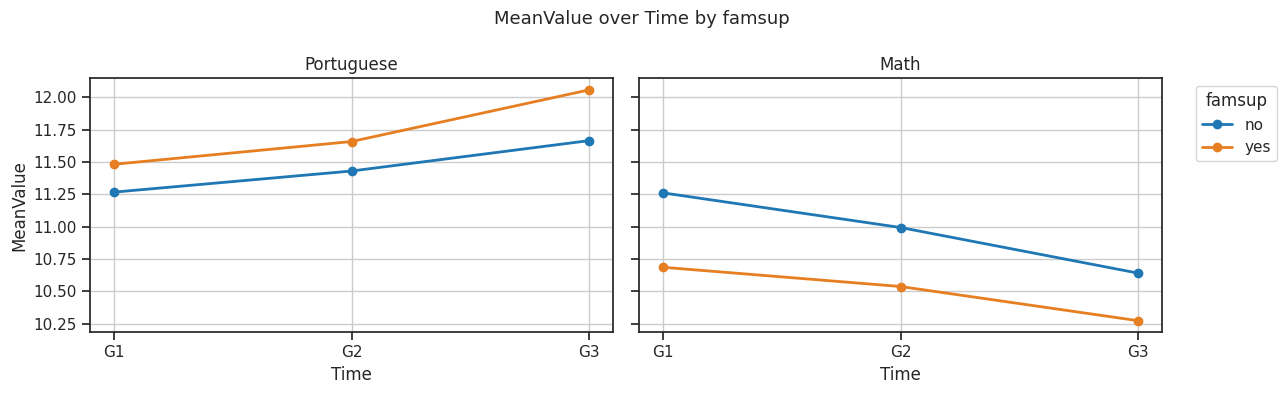

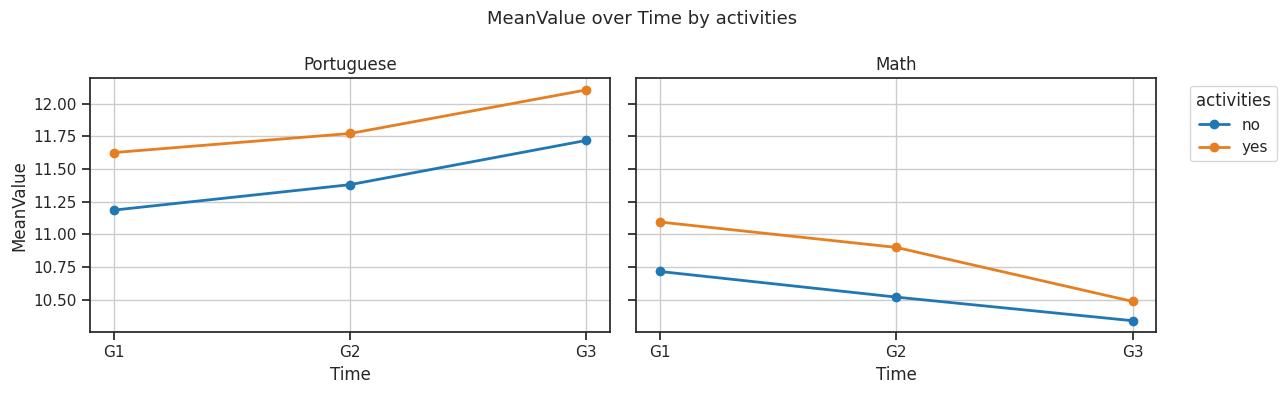

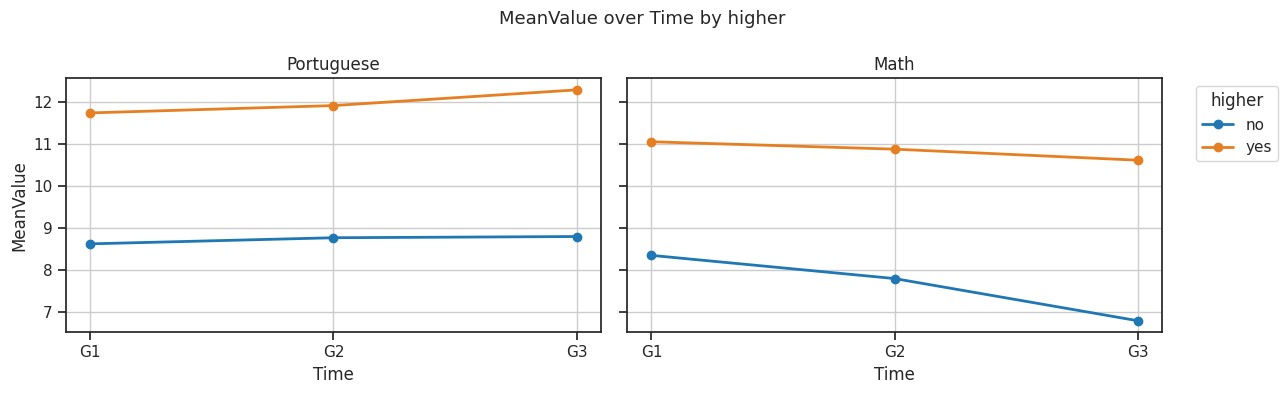

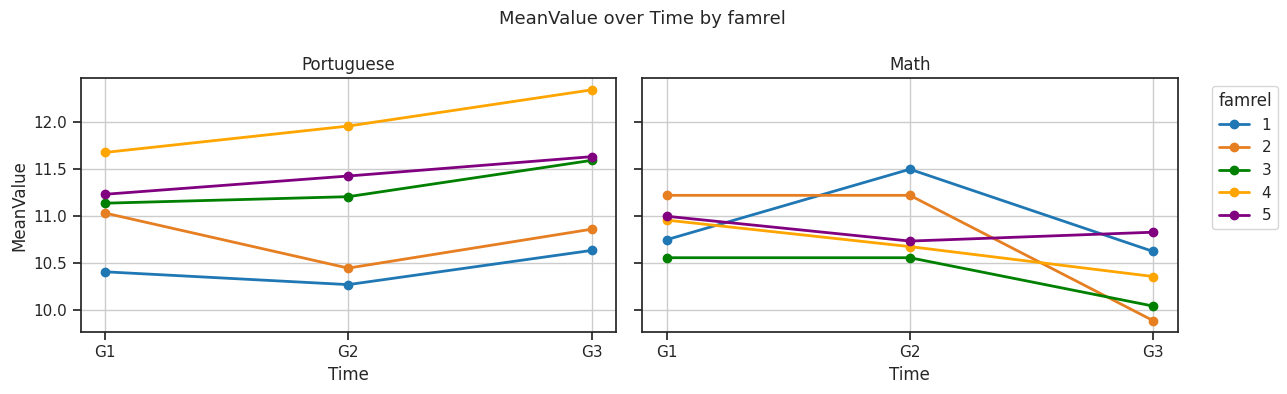

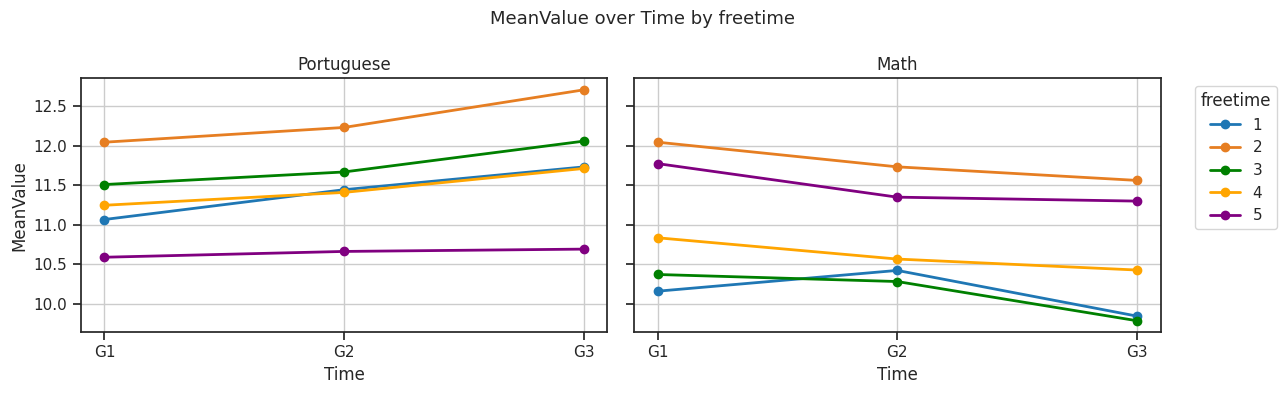

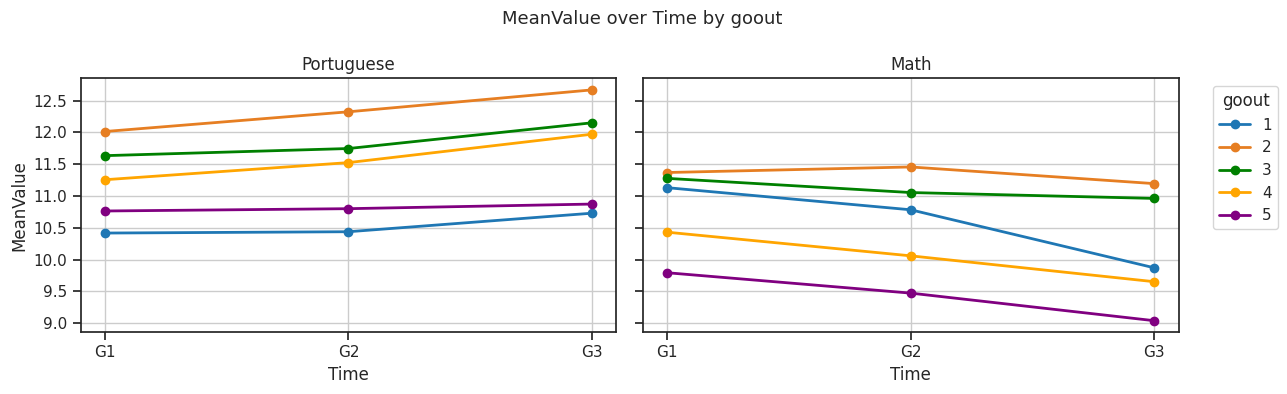

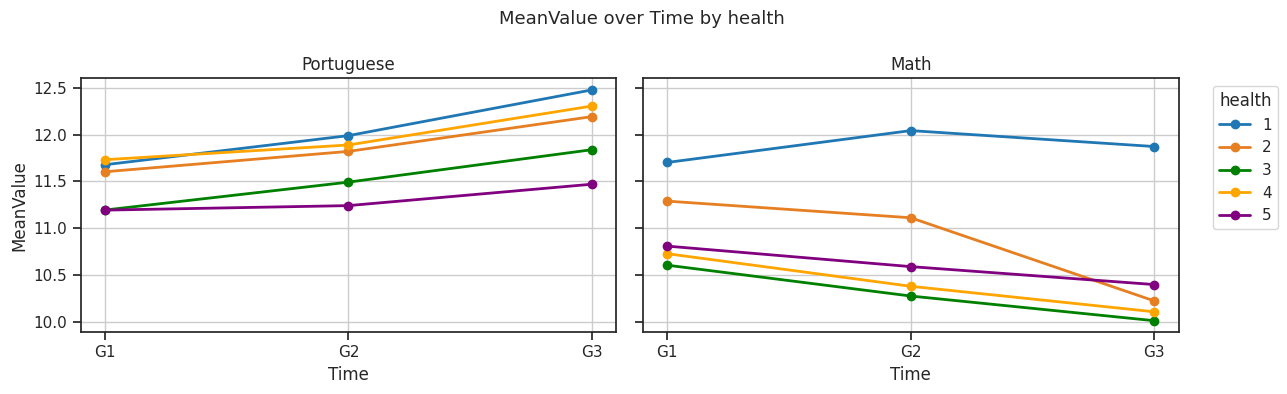

In [39]:
#This section uses line plots of mean grades (G1, G2, G3) to examine how selected categorical and
#ordinal variables are associated with academic performance trajectories over the school year.
#Define columns to plot
interest_vars = [
    "Mjob", "Fjob", "schoolsup", "famsup", "activities",
    "higher", "famrel", "freetime", "goout", "health"
]

from visualization.explore_time import plot_line_grid_over_time
plot_line_grid_over_time(df_combined, performance_cols, interest_vars, 'subject')

**Mother’s Job (Mjob) vs Grades**

- Mean grades follow a stable upward progression from G1 to G3 across all maternal occupation categories.
- Differences between job categories are already visible at G1 and remain relatively constant through G3.
- No category shows a distinct acceleration or decline over time, indicating parallel academic trajectories.
- Overall, mother’s occupation is associated with grade level rather than changes in academic progression.

**Father’s Job (Fjob) vs Grades**

- Average grades increase consistently from G1 to G3 for all paternal occupation groups.
- Performance gaps between categories persist across grading periods, with no major divergence over time.
- The parallel shape of the lines suggests a stable effect throughout the school year.
- Overall, father’s occupation shows a steady association with academic performance level.

**School Support (schoolsup) vs Grades**

- Students without school support consistently show higher mean grades from G1 to G3.
- The gap between supported and non-supported students appears early and remains stable across periods.
- Both groups follow similar trajectories, indicating no compensatory improvement over time.
- Overall, school support is associated with lower average performance, likely reflecting prior academic difficulty rather than causal impact.

**Family Support (famsup) vs Grades**

- Mean grades evolve similarly from G1 to G3 regardless of family support status.
- Students reporting family support tend to maintain slightly higher averages across all periods.
- The absence of divergence suggests a stable, non-accumulative effect.
- Overall, family support shows a modest but consistent association with academic performance.

**Extra-Curricular Activities (activities) vs Grades**

- Grade trajectories from G1 to G3 are smooth and largely parallel for both activity groups.
- Students not participating in activities slightly outperform those who do across all periods.
- Differences remain constant, indicating no time-dependent effect.
- Overall, participation in activities shows a small and stable association with grades.

**Higher Education Intention (higher) vs Grades**

- Students intending to pursue higher education consistently outperform others from G1 onward.
- The performance gap is large and remains pronounced through G3.
- Both groups show parallel progression, indicating early separation rather than divergence over time.
- Overall, higher education intention is one of the strongest indicators of sustained academic performance.

**Family Relationship Quality (famrel) vs Grades**

- Mean grades increase steadily from G1 to G3 across all levels of family relationship quality.
- Higher famrel levels are associated with slightly higher grades at all periods.
- Lines remain mostly parallel, suggesting a stable influence.
- Overall, family relationship quality shows a moderate and consistent association with academic outcomes.

**Free Time (freetime) vs Grades**

- Grade trajectories are similar across free-time levels, with smooth progression from G1 to G3.
- Extreme free-time categories show slightly lower average performance.
- Differences appear early and persist without widening.
- Overall, free time shows a weak but stable relationship with grades.

**Going Out with Friends (goout) vs Grades**

- Mean grades decline slightly as social outing frequency increases.
- This pattern is consistent across G1, G2, and G3.
- Parallel trends indicate no growing penalty over time.
- Overall, frequent social outings are modestly associated with lower academic performance.

**Health Status (health) vs Grades**

- Students across all health levels display consistent grade progression over time.
- Moderate to high health levels are associated with slightly higher averages.
- No health category shows a distinct shift in trajectory.
- Overall, self-reported health has a small but stable association with academic performance.

## 1.5-Multivariate Analysis

In this exploratory analysis, multiple linear regression is applied to examine potential relationships between the final grade (G3) and a comprehensive set of student- and school-related variables. The primary goal is to identify patterns and insights that can guide feature engineering for subsequent modeling, rather than to draw causal conclusions or to produce a predictive model. 

All available variables are initially included to evaluate their individual contributions and to inform further data preparation and selection. Results should be interpreted cautiously, as they reflect correlations in this dataset and may be influenced by multicollinearity or other confounding factors.

In [40]:
import sys
!{sys.executable} -m pip install -q lifelines

#Remove G3 from dataset
predictors = [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
    'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
    'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
    'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
    'G1', 'G2']

#Multiple linear regression (P)
from modeling.regression import linear_regression
modelP = linear_regression(df_port, 'G3', predictors)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 5.8 MB/s eta 0:00:00
                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     90.95
Date:                Tue, 06 Jan 2026   Prob (F-statistic):          3.29e-230
Time:                        22:12:30   Log-Likelihood:                -1043.4
No. Observations:                 649   AIC:                             2171.
Df Residuals:                     607   BIC:                             2359.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
         

In [41]:
from eda.multicollinearity import VIF_check
VIF_check(df_port, predictors)


=== Variance Inflation Factors ===
          Feature    VIF
              age 92.486
               G1 77.637
               G2 72.035
           famrel 19.965
             Medu 15.909
         freetime 12.451
            goout 12.117
       higher_yes 12.030
             Fedu 11.306
       Fjob_other 10.432
        Pstatus_T  9.528
             Walc  8.769
        studytime  8.042
           health  7.957
       traveltime  6.747
             Dalc  6.680
    Fjob_services  5.674
      nursery_yes  5.377
     internet_yes  5.358
  guardian_mother  4.504
        address_U  4.287
       Mjob_other  3.324
       famsup_yes  2.865
    Mjob_services  2.673
     Mjob_teacher  2.556
            sex_M  2.355
        school_MS  2.308
     Fjob_teacher  2.281
   activities_yes  2.214
         absences  1.988
      Mjob_health  1.953
      Fjob_health  1.803
reason_reputation  1.792
     romantic_yes  1.780
      reason_home  1.706
      famsize_LE3  1.627
         failures  1.621
   guardian_ot

In [42]:
from modeling.regression import robust_regression
model_robustP = robust_regression(df_port, 'G3', predictors)

                    Robust linear Model Regression Results                    
Dep. Variable:                     G3   No. Observations:                  649
Model:                            RLM   Df Residuals:                      607
Method:                          IRLS   Df Model:                           41
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 06 Jan 2026                                         
Time:                        22:12:30                                         
No. Iterations:                    24                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

For the Portuguese dataset, the OLS regression yields a high R-squared (0.860), indicating that the included variables collectively correlate strongly with G3. Prior grades, G2 (coef ≈ 0.87) and G1 (coef ≈ 0.13), show the strongest associations with G3, while several categorical features (e.g., Fjob_services, reason_other) exhibit smaller, less stable associations.

Variance Inflation Factor (VIF) analysis highlights severe multicollinearity for age (≈92), G1 (≈78), G2 (≈72), and other variables such as famrel and Medu (>15), suggesting substantial redundancy among predictors and caution when interpreting individual coefficients.

Robust Linear Model (RLM) results, which reduce the influence of outliers, show similar overall trends: the directions of major associations (G1, G2) remain consistent, though some minor categorical coefficients are slightly reduced, indicating modest sensitivity to extreme values. Overall, the patterns observed reflect correlations in the dataset rather than causal effects, and outliers have limited impact on the main associations.

In [43]:
#Multiple linear regression (M)
from modeling.regression import linear_regression
modelM = linear_regression(df_math, 'G3', predictors)

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     47.21
Date:                Tue, 06 Jan 2026   Prob (F-statistic):          7.20e-119
Time:                        22:12:31   Log-Likelihood:                -791.99
No. Observations:                 395   AIC:                             1668.
Df Residuals:                     353   BIC:                             1835.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [44]:
VIF_check(df_math, predictors)


=== Variance Inflation Factors ===
          Feature    VIF
              age 96.636
               G1 55.136
               G2 40.086
           famrel 23.209
       higher_yes 23.075
             Medu 21.447
         freetime 14.729
             Fedu 13.516
            goout 13.122
       Fjob_other 12.907
        Pstatus_T 10.897
             Walc  9.963
        studytime  9.602
           health  8.639
             Dalc  7.638
     internet_yes  7.420
    Fjob_services  7.009
       traveltime  6.661
        address_U  6.048
      nursery_yes  5.595
  guardian_mother  4.738
       Mjob_other  4.295
    Mjob_services  3.886
     Mjob_teacher  3.712
       famsup_yes  3.334
     Fjob_teacher  2.842
            sex_M  2.822
      Mjob_health  2.525
         paid_yes  2.464
   activities_yes  2.359
      Fjob_health  2.131
reason_reputation  2.074
      reason_home  1.976
         absences  1.872
         failures  1.856
   guardian_other  1.796
     romantic_yes  1.763
        school

In [45]:
model_robustM = robust_regression(df_math, 'G3', predictors)

                    Robust linear Model Regression Results                    
Dep. Variable:                     G3   No. Observations:                  395
Model:                            RLM   Df Residuals:                      353
Method:                          IRLS   Df Model:                           41
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 06 Jan 2026                                         
Time:                        22:12:31                                         
No. Iterations:                    26                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

For the Mathematics dataset, the OLS regression also shows a high R-squared (0.846), indicating strong correlations between the included variables and G3. Prior grades, G2 (coef ≈ 0.96) and G1 (coef ≈ 0.19), show the strongest associations, while other features such as famrel, absences, and activities have smaller, less stable associations.

VIF analysis indicates multicollinearity is present but slightly less extreme than in the Portuguese dataset, with G1 (≈55) and G2 (≈40) highly correlated with other variables. Age and Medu remain strongly correlated with other features (>20), suggesting redundancy and caution in interpreting individual coefficients.

Robust Linear Model (RLM) results confirm that the major trends (associations of G1 and G2 with G3) are robust. Minor categorical predictors show small variations, indicating that extreme values have a limited effect on overall patterns. Overall, these results reflect correlations in the data rather than causal relationships.

**Comparison and Implications for Feature Engineering**

Both Portuguese and Mathematics datasets display similar patterns: prior grades (G1 and G2) are strongly associated with G3, while multicollinearity among predictors is a common concern. The Portuguese dataset exhibits slightly stronger multicollinearity for age and G1/G2 than the Mathematics dataset. Outliers appear to have only a modest impact, as evidenced by the similar patterns between OLS and RLM results.

For feature engineering, this suggests:

Prior grades (G1 and G2) should be considered central features for exploratory modeling.

Highly collinear variables (e.g., G1, G2, age, Medu) may require dimensionality reduction or careful selection to reduce redundancy.

Minor categorical predictors can be included for exploration, but their individual associations are weak and unlikely to substantially improve predictive models unless engineered as interactions or aggregated features.

## 1.6-Summary - Notebook 1

| Factor / Analysis | Main Finding | Notes / Insights |
|------------------|-------------|-----------------|
| Prior Grades (G1, G2) | Strong correlation with G3 | Both Portuguese and Math datasets show that students’ previous grades are strongly associated with the final grade. High multicollinearity with each other and age exists (VIFs > 40), so coefficients should be interpreted cautiously. |
| Major Categorical Variables (Fjob, Mjob, Reason, Guardian) | Minor associations observed | Some categories (e.g., Fjob_services, reason_other) show small positive or negative coefficients, but these effects are weak and sensitive to model choice (OLS vs RLM) and multicollinearity. |
| Age | Weak correlation | Positive in Portuguese dataset, slightly negative in Math; VIF extremely high (>90), indicating strong collinearity with G1/G2. |
| School, Sex, Address, Family Size, Parental Status | Minimal direct association | Coefficients small and mostly not statistically significant. Trends consistent across datasets. |
| Travel Time | Slight positive/negative association | In Portuguese dataset, longer travel time shows a modest negative association; in Math, effect is negligible. |
| Study Time & Paid Classes | Small positive associations | Effects are minor; not statistically significant in most cases. Useful mainly for feature exploration, not prediction. |
| Failures | Negative correlation with G3 | Students with past failures tend to have lower final grades. Effect is consistent across datasets but should be interpreted as association only. |
| Family / School Support | Minor effect | Family support slightly associated with higher G3; school support shows weak associations (possibly reflecting intervention for struggling students). |
| Extra-Curricular Activities | Minimal effect | Participation shows small positive or negative association; robust trends observed in RLM models. |
| Health & Well-being (Dalc, Walc, Health) | Weak associations | Daily alcohol consumption or health measures have minor correlations; effects slightly influenced by outliers. |
| Multicollinearity & Outliers | Multicollinearity present, outliers moderately affect minor coefficients | High VIFs for G1, G2, age, Medu suggest redundancy among predictors. RLM models confirm that main trends (G1/G2 correlations) are robust, while minor categorical coefficients can vary slightly. |